# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


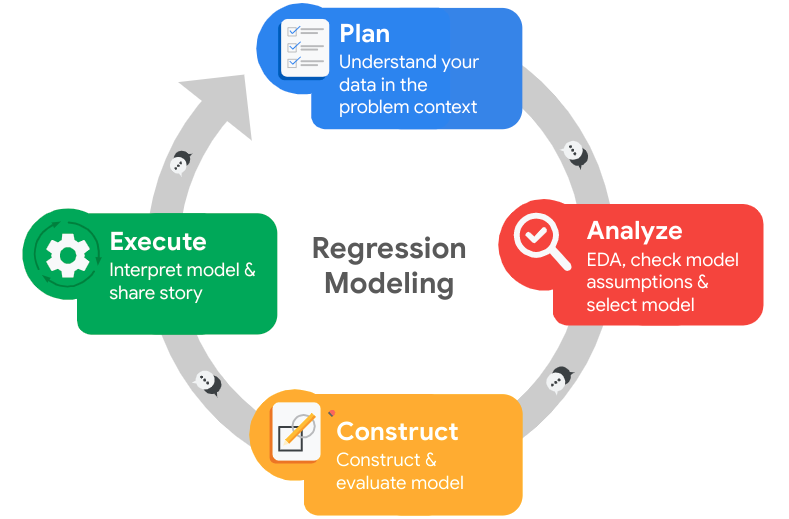

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages

#Operational Packages
import pandas as pd
import numpy  as np
import statistics

#Data Viz Packages
import matplotlib.pyplot as plt
import seaborn as sns

#Statistical Analysis Packages
import scipy
from scipy import stats
from scipy.stats import norm

#Regression Analysis Packages
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

#Machine Learning Packages
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance
from xgboost import plot_importance

# This module lets us save our models once we fit them.
import pickle

In [2]:
#Upgrade Seaborn
!pip install seaborn --upgrade

You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

Kaggle link: https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction

In [3]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
df0.info()

#No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
df0

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [7]:
# Rename columns as needed
df = df0.rename({'time_spend_company' : 'years_spend_company', 'Work_accident' : 'bool_accident', 'left' : 'did_leave'\
                , 'Department' : 'department', 'number_project' : 'number_projects', \
                 'average_montly_hours':'average_monthly_hours'}, axis=1)
df


# Display all column names after the update
df


,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,years_spend_company,bool_accident,did_leave,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_projects        14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   years_spend_company    14999 non-null  int64  
 5   bool_accident          14999 non-null  int64  
 6   did_leave              14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
#Check descriptive statistics are the same
df.describe()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,years_spend_company,bool_accident,did_leave,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates
dup_mask = df.duplicated()
df[dup_mask].count()

#3008 Duplicate rows

satisfaction_level       3008
last_evaluation          3008
number_projects          3008
average_monthly_hours    3008
years_spend_company      3008
bool_accident            3008
did_leave                3008
promotion_last_5years    3008
department               3008
salary                   3008
dtype: int64

In [11]:
# Inspect some rows containing duplicates as needed
duplicates = df[dup_mask]
duplicates.describe()

#Noticed the majority of duplicates left the company for some reason

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,years_spend_company,bool_accident,did_leave,promotion_last_5years
count,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000
mean,0.545765,0.713787,3.803856,203.349734,4.029920,0.106051,0.525266,0.038564
std,0.266406,0.182012,1.477272,54.467101,1.795619,0.307953,0.499444,0.192585
min,0.090000,0.360000,2.000000,97.000000,2.000000,0.000000,0.000000,0.000000
25%,0.380000,0.540000,2.000000,151.000000,3.000000,0.000000,0.000000,0.000000
50%,0.530000,0.725000,4.000000,204.000000,3.000000,0.000000,1.000000,0.000000
75%,0.780000,0.880000,5.000000,253.000000,5.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df.drop_duplicates(ignore_index = True)


# Display first few rows of new dataframe as needed
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_projects        11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   years_spend_company    11991 non-null  int64  
 5   bool_accident          11991 non-null  int64  
 6   did_leave              11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 936.9+ KB


### Check outliers

Check for outliers in the data.

In [13]:
df['years_spend_company'].mean()

3.3648569760653824

In [14]:
department_means = df.groupby('department')['years_spend_company'].mean()
department_means

department
IT             3.350410
RandD          3.319885
accounting     3.404187
hr             3.256240
management     3.981651
marketing      3.421991
product_mng    3.341108
sales          3.380673
support        3.292696
technical      3.309269
Name: years_spend_company, dtype: float64

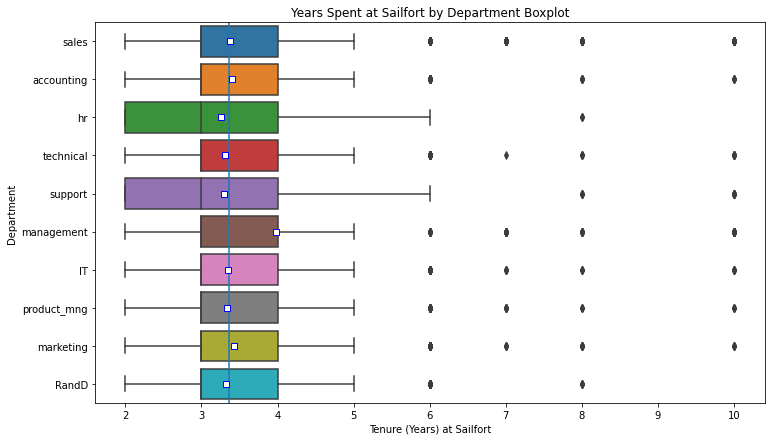

In [15]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers


plt.figure(figsize=(12,7))
sns.boxplot(data=df, x=df['years_spend_company'], y=df['department'], showmeans=True, \
           meanprops = {'marker':'s', 'markerfacecolor':'white', 'markeredgecolor':'blue'})
plt.title(label='Years Spent at Sailfort by Department Boxplot')
plt.axvline(df['years_spend_company'].mean())
plt.xlabel('Tenure (Years) at Sailfort')
plt.ylabel('Department')

plt.show()



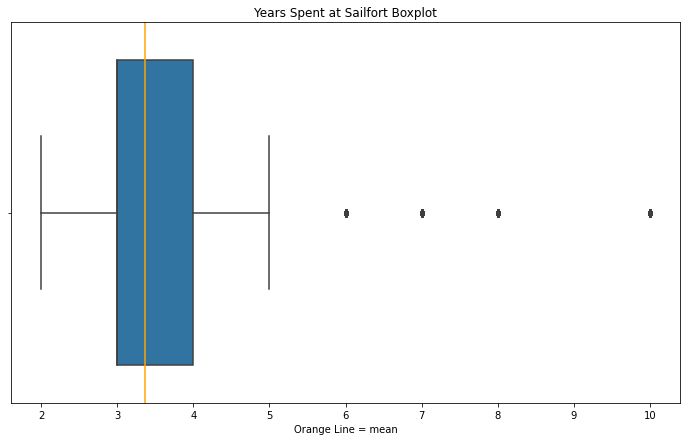

In [16]:
plt.figure(figsize=(12,7))
sns.boxplot(data=df, x=df['years_spend_company'])
plt.title(label='Years Spent at Sailfort Boxplot')
plt.axvline(df['years_spend_company'].mean(), c = 'orange')
plt.xlabel('Orange Line = mean')

plt.show()

In [17]:
#Identify outliers and return rows with outliers

def outlier_detector(column_name, percentile):
    threshold = df[f"{column_name}"].quantile(percentile)
    
    return df.loc[df[column_name] >= threshold]
    
outlier_detector('years_spend_company', 0.95)

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,years_spend_company,bool_accident,did_leave,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11985,0.22,0.94,3,193,10,0,0,1,management,high
11986,0.90,0.55,3,259,10,1,0,1,management,high
11987,0.74,0.95,5,266,10,0,0,1,management,high
11988,0.85,0.54,3,185,10,0,0,1,management,high


In [18]:
#Add Z-Score of Tenure to our table
df['z_score_tenure'] = ((df['years_spend_company'] - df['years_spend_company'].mean())/df['years_spend_company'].std())

In [19]:
# Distribution of Salary
total = df['salary'].value_counts()[0] + df['salary'].value_counts()[1] + df['salary'].value_counts()[2]

salary_perc_list = []
for value in df['salary'].value_counts():
    salary_perc_list.append(f'{((value/total)*100).round(2)}%')
    
salary_perc_list

print(f'low percent: {salary_perc_list[0]} raw: {df["salary"].value_counts()[0]}')
print(f'med percent: {salary_perc_list[1]} raw: {df["salary"].value_counts()[1]}')
print(f'high percent: {salary_perc_list[2]} raw: {df["salary"].value_counts()[2]}')

low percent: 47.87% raw: 5740
med percent: 43.87% raw: 5261
high percent: 8.26% raw: 990


In [20]:
#Order of category_names matters

def percent_from_whole(category_names, data, column_name=str, n_round=int):
    total = 0
    percent_list = []
    
    #Get total
    for i in range(len(data[column_name].value_counts())):
        total += data[column_name].value_counts()[i]
    
    #Get Percents
    for value in data[column_name].value_counts():
        percent_list.append(f'{((value/total)*100).round(n_round)}%')
        
        
    #Print Categories with Corresponding Percentages and Raw Values
    for x in range(len(data[column_name].value_counts())):
        print(f'{category_names[x]}: {percent_list[x]}, raw: {data[column_name].value_counts()[x]}')

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [21]:
# Get numbers of people who left vs. stayed
df['did_leave'].value_counts()

# Get percentages of people who left vs. stayed

category_names = ['did not leave', 'left']

percent_from_whole(data=df, column_name='did_leave', n_round=3, category_names=category_names)

did not leave: 83.396%, raw: 10000
left: 16.604%, raw: 1991


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

# EDA and Insights Section

# Sailfort Motors HR Data Overview:

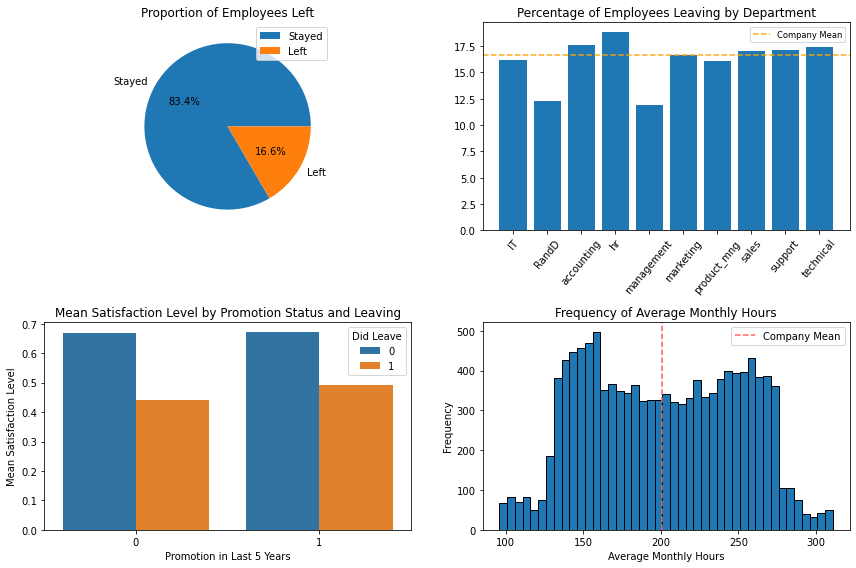

In [22]:
fig, axes = plt.subplots(2,2, figsize = (12,8))

#Figure 1
ax00_labels = ['Stayed', 'Left']
axes[0,0].pie(df['did_leave'].value_counts(), labels=ax00_labels, autopct='%1.1f%%')
axes[0,0].legend()
axes[0,0].set_title('Proportion of Employees Left')

#Figure 2
grouped_dep_left = df.groupby(['department'])['did_leave'].mean().reset_index()
axes[0,1].bar(x=grouped_dep_left['department'], height = grouped_dep_left['did_leave']*100)
axes[0,1].set_xticklabels(labels = grouped_dep_left['department'], rotation=50)
plt.ylabel('Percentage of Employees Leaving')
axes[0,1].set_title('Percentage of Employees Leaving by Department')
axes[0,1].axhline(y=df['did_leave'].mean()*100, color = 'orange', alpha = 0.9, label = 'Company Mean',\
           linestyle='--')
axes[0,1].legend(fontsize = 'small')

#Plt 3
group_promo_leave = df.groupby(['promotion_last_5years','did_leave'])['satisfaction_level'].mean().reset_index()

# Plot the grouped bar chart
sns.barplot(x=group_promo_leave['promotion_last_5years'], y=group_promo_leave['satisfaction_level'], hue = group_promo_leave['did_leave']\
            , ax=axes[1,0])

# Customize the plot
axes[1,0].set_xlabel('Promotion in Last 5 Years')
axes[1,0].set_ylabel('Mean Satisfaction Level')
axes[1,0].set_title('Mean Satisfaction Level by Promotion Status and Leaving')
axes[1,0].legend(title = 'Did Leave')
#plt.xticks(rotation=0)  # Remove rotation of x-axis labels

#Plt 4
bin_width = 5
axes[1,1].hist(df['average_monthly_hours'], bins = range(int(min(df['average_monthly_hours'])), \
         int(max(df['average_monthly_hours'])) + bin_width, bin_width), edgecolor='black')

axes[1,1].set_xlabel('Average Monthly Hours')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('Frequency of Average Monthly Hours')
axes[1,1].axvline(x=200.47, color='#ff6361', label='Company Mean', ls='--')
axes[1,1].legend()


#Get normal envelope for plot 4
#mu, std = norm.fit(df['average_monthly_hours'])
#xmin, xmax = int(min(df['average_monthly_hours'])), int(max(df['average_monthly_hours'])) + bin_width
#x = np.linspace(xmin, xmax, 100)
#p = norm.pdf(x, mu, std) * 55000
#axes[1,1].plot(x, p, 'k', linewidth=2)
plt.tight_layout()
plt.show()

## Turnover by Department
<p>Across Salifort Motors roughly (16.6% turnover rate)</p>
<p>Far less employees leaving in the RandD and Management departments (both ~12.4% respectively)</p>
<p>Most employees leaving in the HR department (~20%)</p>
<p>Many employees leaving in the Accounting, Technical, Support and Sales departments (17%-17.5%)</p>
<p>Rest of departments close to average or below average</p>

## Satisfaction Levels by Promotion
<p>Not a significant difference in satisfaction levels by promotion</p>
<p>Employee's satsifaction levels are roughly the same regardless of promotion status</p>

## Frequency of Average Monthly Hours
<p>Average employee works 200 hours per month</p>
<p>Most employees work ~160 hours a month</p>
<p>Some employees working over 275 hours or less than 125 hours</p>


## Takeaways:
<p> Promotions don't appear to correlate strongly with satisfaction levels </p>
<p> Employees who choose stay probably are more satsified with their work </p>
<p> Employees who choose to leave probably are less satsified with their work </p>

In [23]:
### Feature Creation of Departments and Groups DF ###

#df.groupby('department')['satisfaction_level'].count().reset_index() Just gives the count of employees in each department

## Creating Evaluation Metrics to Identify Department Performance

#Salaries DF
new = df[df['salary'] == 'high'].groupby('department')['satisfaction_level'].count().reset_index()
new = new.rename(columns={'satisfaction_level' : 'high_count'})

new1 = df[df['salary'] == 'medium'].groupby('department')['satisfaction_level'].count().reset_index()
new1 = new1.rename(columns={'satisfaction_level' : 'med_count'})

new2 = df[df['salary'] == 'low'].groupby('department')['satisfaction_level'].count().reset_index()
new2 = new2.rename(columns={'satisfaction_level' : 'low_count'})

salaries = new.merge(new1, on='department', how='left')
salaries = salaries.merge(new2, on='department', how='left')

#Department Satisfaction DF
dept_satisfaction = df.groupby('department')['satisfaction_level'].mean().reset_index()

#Get Raw Number Overworked Per Department and Initialize Department DF
grouped = df[df['number_projects'] >=6].groupby('department')['number_projects'].count().reset_index()
grouped = grouped.rename(columns={'number_projects': 'count_overworked'})

#Get Number of Employees in Each Department and Calculate Percentage Overworked in Each Department
result = pd.merge(grouped, df.groupby('department')['satisfaction_level'].count().reset_index(), on = 'department', how = 'left')
result['percent_overworked'] = (result['count_overworked'] / result['satisfaction_level']) * 100

#Renaming Satisfaction_Level to Department Count
result = result.rename(columns={'satisfaction_level': 'department_count'})

#Calculate Percentage Promoted and Left Per Department
result2 = pd.merge(result, df.groupby('department')['promotion_last_5years'].sum().reset_index(), on = 'department', how = 'left')
result2['percent_promoted'] = (result2['promotion_last_5years'] / result2['department_count']) * 100
result3 = pd.merge(result2, df.groupby('department')['did_leave'].sum().reset_index(), on = 'department', how = 'left')
result3['percent_left'] = (result3['did_leave'] / result3['department_count']) * 100

#Calculate Salary Spread in Each Department
result4 = result3.merge(salaries, on='department', how='left')
result4['high_percent'] = (result4['high_count'] / result3['department_count']) * 100
result4['med_percent'] = (result4['med_count'] / result3['department_count']) * 100
result4['low_percent'] = (result4['low_count'] / result3['department_count']) * 100

#Get Mean Satisfaction in Each Department
result5 = result4.merge(dept_satisfaction, on = 'department', how='left')
result5 = result5.rename(columns = {'satisfaction_level' : 'department_satisfaction_level'})

#Get Percent Underworked in Each Department and Add to Result 6
count_underworked = df[df['number_projects'] <= 2].groupby('department')['number_projects'].count().reset_index()
count_underworked = count_underworked.rename(columns={'number_projects': 'count_underworked'})

#Final Result (Result 7)
result6 = result5.merge(count_underworked, on = 'department', how='left')
result6['percent_underworked'] = (result6['count_underworked'] / result6['department_count']) * 100

#Drop Raw Columns from Result 7
result6 = result6.sort_values(by='percent_left').drop(columns = ['high_count', 'med_count', 'low_count', 'did_leave', 'promotion_last_5years', 'count_overworked', 'count_underworked'])

## Importing Groups A, B, and C
## Creation of Departments Metric DF

#The proportion of Group A's, Group B's and C's might give insight into underlying characteristics of departments

#Set Parameters to Get Group A and Group B
groupA = df[(df['did_leave'] == 1) & (df['satisfaction_level']<0.15) & (df['average_monthly_hours']>225)]

groupB = df[(df['did_leave'] == 1) & (df['satisfaction_level']>0.3) & (df['satisfaction_level']<0.5) \
            & (df['average_monthly_hours']<160) & (df['average_monthly_hours']>120)]

groupC = df[(df['did_leave'] == 1) & (df['satisfaction_level']>0.65) & (df['average_monthly_hours']>210) \
           & (df['average_monthly_hours']<280)]

#Create GroupA and GroupB by Department Data Frames
groupA_by_dept = groupA['department'].value_counts().reset_index()
groupB_by_dept = groupB['department'].value_counts().reset_index()
groupC_by_dept = groupC['department'].value_counts().reset_index()

#Rename Columns 
groupA_by_dept = groupA_by_dept.rename(columns = {'department' : 'groupA_Count', 'index' : 'department'})
groupB_by_dept = groupB_by_dept.rename(columns = {'department' : 'groupB_Count', 'index' : 'department'})
groupC_by_dept = groupC_by_dept.rename(columns = {'department' : 'groupC_Count', 'index' : 'department'})

#Merge into One DF
groupAB_by_dept = groupA_by_dept.merge(groupB_by_dept, on = 'department', how = 'left')
groupABC_by_dept = groupAB_by_dept.merge(groupC_by_dept, on = 'department', how = 'left')

#Create Departments DF with all Department Info
departments_df = groupABC_by_dept.merge(result6, on = 'department', how='left')
departments_df['groupA_percent'] = (departments_df['groupA_Count'] / departments_df['department_count']) * 100
departments_df['groupB_percent'] = (departments_df['groupB_Count'] / departments_df['department_count']) * 100
departments_df['groupC_percent'] = (departments_df['groupC_Count'] / departments_df['department_count']) * 100

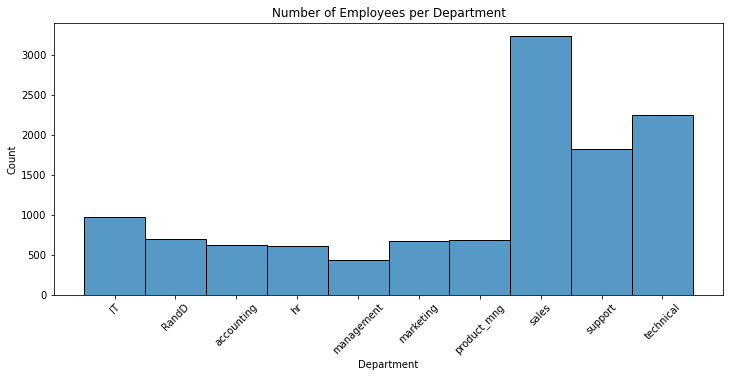

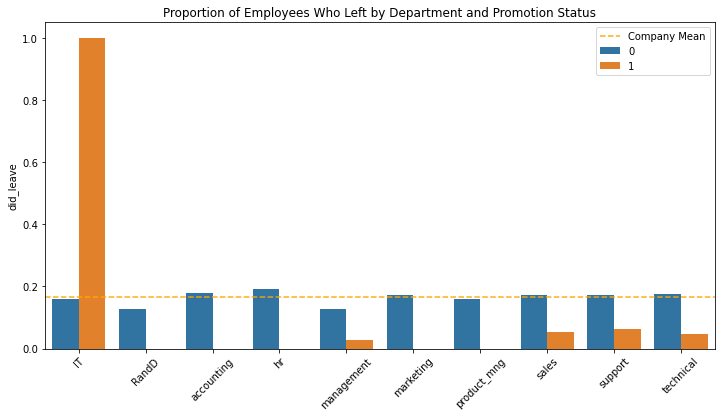

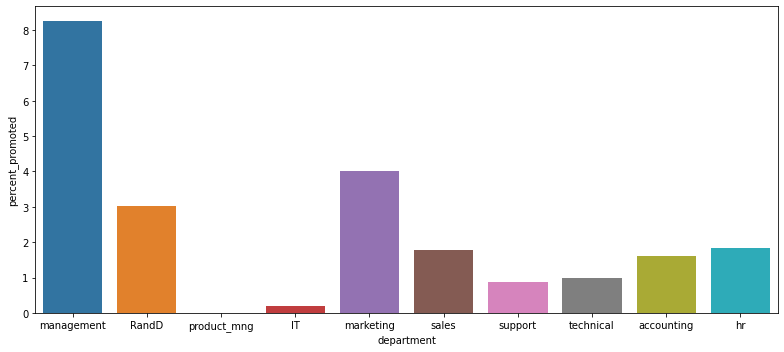

In [24]:
department_order = [
    'IT', 'RandD', 'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales', 'support', 'technical'
]

df['department'] = pd.Categorical(df['department'], categories=department_order, ordered=True)

### First Graph

plt.figure(figsize=(12,5))
sns.histplot(data=df, x='department')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.xlabel('Department')
plt.title('Number of Employees per Department')

### Second Graph (Deleted)

"""# Group the data by department and promotion status, and count the number of promotions
promotion_count = df[df['promotion_last_5years'] == 1].groupby('department')['promotion_last_5years'].count().reset_index()
# Add a row for 'product_mng' with 0 promotions
promotion_count = promotion_count.append({'department': 'product_mng', 'promotion_last_5years': 0}, ignore_index=True)
# Sort the DataFrame by 'department'
#promotion_count = promotion_count.sort_values(by='department')

plt.figure(figsize=(12, 5))  # Set the figure size for the second graph to match the width of the first one (width=12, height=6)
sns.barplot(data=promotion_count, x='department', y='promotion_last_5years')
plt.title('Number of People Promoted in Each Department')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Number of People Promoted')
plt.yticks(range(0, max(promotion_count['promotion_last_5years']) + 1, 5))"""

### First Graph

depart_promote_group = df.groupby(['department', 'promotion_last_5years'])['did_leave'].mean().reset_index()
plt.figure(figsize=(12, 6))  # Set the figure size for the first graph (width=12, height=6)
sns.barplot(data=depart_promote_group, x='department', y='did_leave', hue='promotion_last_5years')
plt.title('Proportion of Employees Who Left by Department and Promotion Status')
plt.xticks(rotation=45)
plt.axhline(y=df['did_leave'].mean(), color = 'orange', alpha = 0.9, label = 'Company Mean',\
           linestyle='--')
#y_ticks = [i/20 for i in range(0, 21)]
plt.xlabel('')
plt.legend()
#plt.yticks(y_ticks)
plt.show()

#Fourth Graph
plt.figure(figsize=(11,5))
sns.barplot(x=result6['department'], y=result6['percent_promoted'])
plt.yticks = [i/20 for i in range(0,21)]

# Show both graphs one on top of the other
plt.tight_layout()
plt.show()


## Department Sizes & Promotions
<p>1. The three largest departments (in descending order): Sales, Technical, and Support.</p>
<p>2. The three smallest departments (in ascending order): Management, HR, and Accounting</p>
<p>3. Highest levels of promotion per capita: Management, RandD and Marketing</p>
<p>4. Lowest levels of promotion per capita: Product_MNG, IT and Support</p>
<p>5. Everyone who was promoted on IT (2 employees total) left the company</p>
<p>6. No one has been promoted in the Product_MNG department</p>
<p>7. <strong> In general, promoted employees are far less likely to leave with the exception of IT</strong></p>


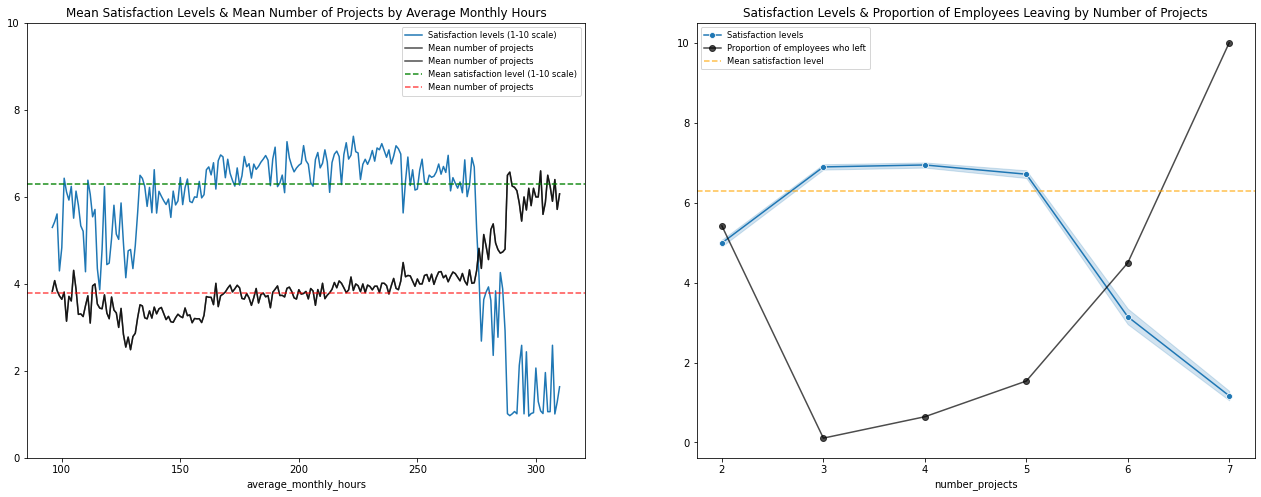

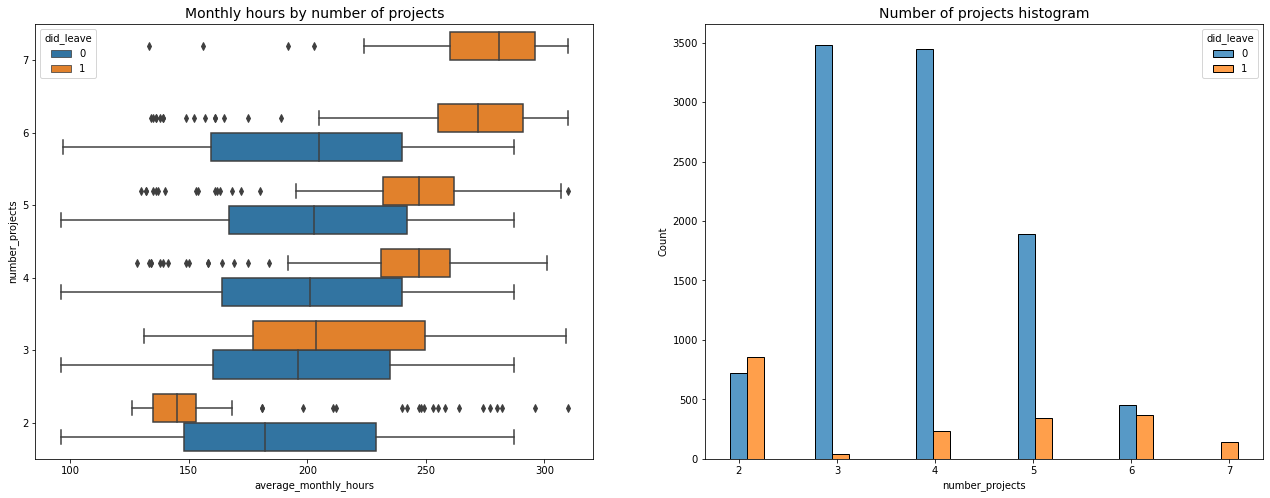

In [25]:
#Getting Proportion of Employees Who Left for Each Number of Project
result = pd.crosstab(index=df['number_projects'], columns=df['did_leave'], margins=True)
result['proportion'] = result[1] / result['All']
result_drop=result.drop(labels = 'All',axis=0)
result_drop

fig, ax = plt.subplots(1, 2, figsize = (22,8))

#Figure 1

avg_monthly_hours_mean_satisfaction = df.groupby('average_monthly_hours')['satisfaction_level'].mean()
avg_monthly_hours_mean_satisfaction.columns = ['mean_satisfaction_level']

avg_monthly_mean_projects = df.groupby(['average_monthly_hours'])['number_projects'].mean()

sns.lineplot(data=avg_monthly_hours_mean_satisfaction, \
             x=avg_monthly_hours_mean_satisfaction.index, \
             y=avg_monthly_hours_mean_satisfaction*10, label = 'Satisfaction levels (1-10 scale)', ax=ax[0])

ax[0].plot(avg_monthly_mean_projects.index, avg_monthly_mean_projects, linestyle='-', color = 'black', alpha = 0.7, \
        label='Mean number of projects')

ax[0].plot(avg_monthly_mean_projects.index, avg_monthly_mean_projects, linestyle='-', color = 'black', alpha = 0.7, \
        label='Mean number of projects')

ax[0].axhline(y=df['satisfaction_level'].mean()*10, color = 'green', alpha = 0.9, label = 'Mean satisfaction level (1-10 scale)',\
           linestyle='--')

ax[0].axhline(y=df['number_projects'].mean(), color = 'red', alpha = 0.7, label = 'Mean number of projects',\
           linestyle='--')

ax[0].set_title('Mean Satisfaction Levels & Mean Number of Projects by Average Monthly Hours')
ax[0].set_ylabel('')
ax[0].set(ylim=(0, 10))

#plt.axvline(x=275, color='purple', alpha=0.7, linestyle=':')

ax[0].legend(prop={'size':'small'})
#plt.show()


#Figure 2

sns.lineplot(data=df, x=df['number_projects'], y=df['satisfaction_level']*10, label = 'Satisfaction levels', marker = 'o', ax=ax[1])
ax[1].set_title('Satisfaction Levels & Proportion of Employees Leaving by Number of Projects')
ax[1].plot(result_drop.index, result_drop['proportion']*10, marker='o', linestyle='-', color = 'black', alpha = 0.7, \
        label='Proportion of employees who left')
ax[1].axhline(y=df['satisfaction_level'].mean()*10, color = 'orange', alpha = 0.7, label = 'Mean satisfaction level',\
           linestyle='--')
ax[1].set_ylabel('')
ax[1].legend(fontsize='small')
#plt.show()

#Figure 3, 4

fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df, x='average_monthly_hours', y='number_projects', hue='did_leave', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df[df['did_leave']==0]['number_projects']
tenure_left = df[df['did_leave']==1]['number_projects']
sns.histplot(data=df, x='number_projects', hue='did_leave', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

# Grouping Employees Who Left Based on Key Attributes

There are a couple of key characteristics which describe why an employee may leave Sailfort Motors. Upon analyzing these attributes it is clear that different employees may choose to leave or stay with the company for different reasons, however, upon further analysis it is apparent that employees who left Sailfort Motors shared similar attributes. It is helpful to categorize different "groups" of employees who may have left the company for similar reasons due to similar shared attributes. Further analyzing these "groups" of employees who left based on their attributes can help us find insight into different reasons employees may leave Sailfort Motors.

### Attribute 1: Average Monthly Hours

#### Employees who Stayed:
<p>1. Employees that fell close to the mean levels of satisfaction worked between 160 and 270 average monthly hours.
     <p>> These employees worked on a minimum of 4 projects and a maximum of 5.</p>
     <p>> The most satisfied employees worked 225 average monthly hours.</p>
     
#### Employees who Left:
<p>2. Employees who worked more than 250 hours were far more likely to leave the company</p>
    <p> > These employees generally worked on 5 projects or more </p>
<p>3. Satisfaction levels generally rose as employees worked more until around 225 hours where there begins a decline </p>
<p>4. Employees working around ~135 hours (~2 projects) were noticeably dissatisfied with their work </p>
<p>6. Employees working 275+ hours were the least satisfied with their work </p>


### Attribute 2: Number of Projects

This attribute is strong associated with average monthly hours, but not identical.

#### Employees who Stayed:
<p>1. Employees that fell close to the mean levels of satisfaction worked on 3-5 projects at a time.
<p>2. Employees were most satisfied working on 3 projects </p>
<p>3. Employees working on more than 3 projects had higher chances of leaving the company, substantially increasing after 5 </p>

#### Employees who Left:
<p>4. After 5 projects, there is a strong negative correlation with satisfaction levels and potential to leave the company </p>
<p>5. Every employee working on 7 projects left the company </p>
<p>6. Most employees working on 2 or 5 projects left the company, and were extremely dissatisfied with their work. </p>


### Attribute 3: Satisfaction levels

#### Employees who Stayed:
<p>1. Employees who stayed in the company generally worked on 3-5 projects, this is generally associated with the highest levels of satisfaction. </p>

#### Employees who Left:  
<p>2. Employees who left either worked on 2, 5, 6 or 7 projects. Working on one of these number of projects is associated with the lowest levels of satisfaction. </p>

## Group Analysis and General Trends
<p>1. Employees that worked on more projects worked higher average monthly hours.
<p>2. Employees that were overworked probably got burnt out and left the company </p>
<p>3. Employees working on 6 or 7 projects were extremely unhappy, and tended to leave </p>
<p>4. Employees working on 2 projects were extremely dissatisfied with their work and tended to leave </p>

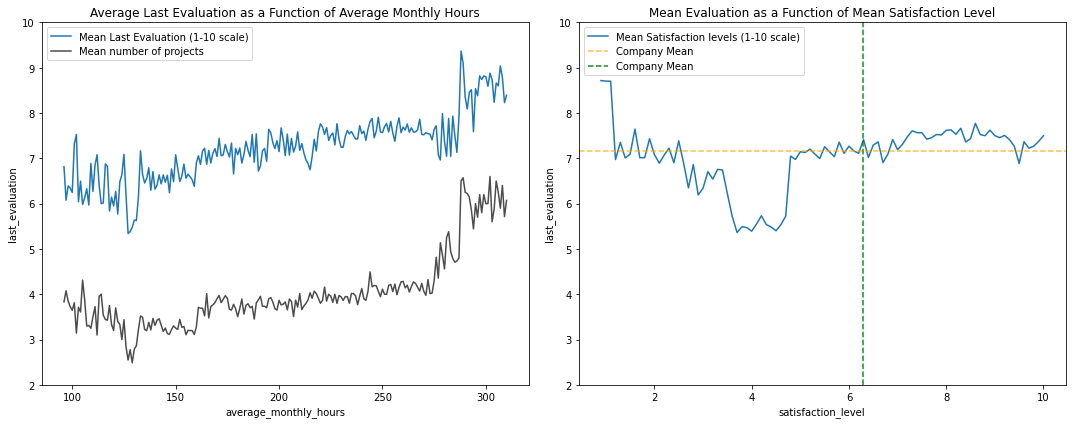

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))


#Figure 1
avg_monthly_mean_eval = df.groupby(['average_monthly_hours'])['last_evaluation'].mean()

sns.lineplot(data=avg_monthly_mean_eval, \
             x=avg_monthly_mean_eval.index, \
             y=avg_monthly_mean_eval*10, label = 'Mean Last Evaluation (1-10 scale)', ax = ax[0])

ax[0].plot(avg_monthly_mean_projects.index, avg_monthly_mean_projects, linestyle='-', color = 'black', alpha = 0.7, \
        label='Mean number of projects')

ax[0].set_title('Average Last Evaluation as a Function of Average Monthly Hours')
ax[0].set(ylim=(2, 10))
ax[0].legend()


#Figure 2
last_eval_mean_satisfaction = df.groupby(['satisfaction_level'])['last_evaluation'].mean()

sns.lineplot(data=last_eval_mean_satisfaction, \
             x=last_eval_mean_satisfaction.index*10, \
             y=last_eval_mean_satisfaction*10, label = 'Mean Satisfaction levels (1-10 scale)', ax=ax[1])
ax[1].set_title('Mean Evaluation as a Function of Mean Satisfaction Level')
ax[1].axhline(y=df['last_evaluation'].mean()*10, color = 'orange', alpha = 0.7, label = 'Company Mean',\
           linestyle='--')
ax[1].axvline(x=df['satisfaction_level'].mean()*10, color = 'green', alpha = 0.9, label = 'Company Mean',\
           linestyle='--')
ax[1].set(ylim=(2, 10))
ax[1].legend()

plt.tight_layout()
plt.show()

# Identifying Key Groups for Analysis

## Group A
<p>1. Employees that worked the most hours/most projects received extremely high evaluation reports
<p>3. Employees with the lowest satisfaction levels tended to receive the highest evaluation reports </p>
<p> <strong> Group A: Represents a group of employees that work the hardest, tend to have the lowest satisfaction levels and usually leave the company. Maybe these individuals represent employees who left due to burnout or felt underappreciated/underpaid for their hardwork. This group of employees are extremely strong workers based on the last_evaluation metric. </strong> </p>

## Group B
<p>1. Employees that worked around 135 hours 
<p>2. Usually work on 2 projects, possibly 3. </p>
<p>2. Had below average satisfaction levels and below average evaluation reprots. </p>
<p> <strong> Group B: Represents a group of employees that either: did not fit in well with the company, were not assigned a sufficient amont of work, and possibily their skills were underutilized due to managerial oversight. </strong> </p>

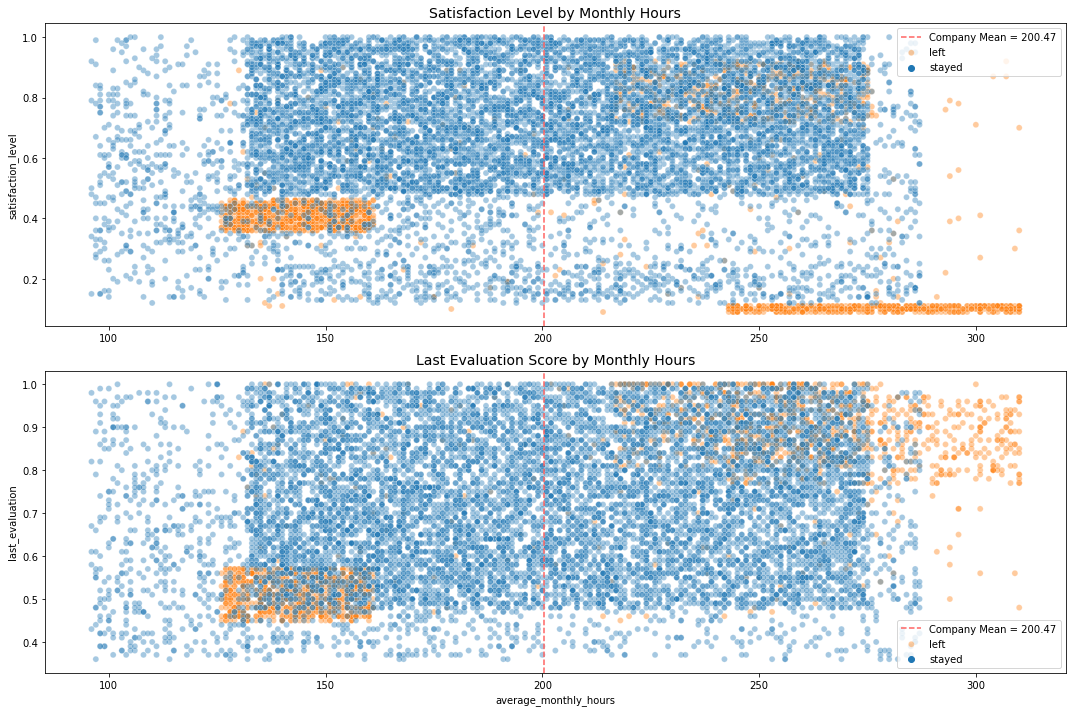

In [27]:
fig, ax = plt.subplots(2, 1, figsize=(15,10))


#Figure 1
sns.scatterplot(data=df, x='average_monthly_hours', y='satisfaction_level', hue='did_leave', alpha=0.4, ax=ax[0])
ax[0].axvline(x=200.47, color='#ff6361', label='Company Mean', ls='--')
ax[0].legend(labels=['Company Mean = 200.47', 'left', 'stayed'])
ax[0].set_title('Satisfaction Level by Monthly Hours', fontsize='14');\
ax[0].set_xlabel("")

#Figure 2
sns.scatterplot(data=df, x='average_monthly_hours', y='last_evaluation', hue='did_leave', alpha=0.4, ax = ax[1])
ax[1].axvline(x=200.47, color='#ff6361', label='Company Mean', ls='--')
ax[1].legend(labels=['Company Mean = 200.47', 'left', 'stayed'])
ax[1].set_title('Last Evaluation Score by Monthly Hours', fontsize='14');

plt.tight_layout()
plt.show()

#ax[0].axhline(y=0.63, color='purple', label='Company Mean', ls='--')

# Leaver Groups Confirmation by Scatterplot

Observing the scatterplots above the existence of these groups corresponding to orange clusters becomes apparent.

## We have already identified two main groups of workers which leave the company
**Group A:** Hardest working employees, high evaluation reports, lowest satisfaction levels.

**Group B:** Lower performing employees, below mean average monthly hours, below mean satisfaction levels, below mean evaluation reports.

The existence of Group A and Group B becomes visually apparent when observing the scatterplot of satisfaction_level as a function of average_monthly_hours. 

Group A has satisfaction levels less than 20%, and works at least 240 hours.

Group B has sastisfaction levels ranging from 30%-50% and work between 125 hours and 165 hours.

## The identifaction of Group C

#### Group C is much less noticable and distinct than Groups A or C but also represents a sizable portion of employees that have left Sailfort Motors. 

Group C represents a group of leavers who have:
- Satisfaction levels ranging from 65%-85%, 
- Work between ~220-275 hours a month. 
- Working on 4-5 projects

So Group C works slightly less than Group A, with much higher levels of satisfaction.

### The Spread of the Last Evaluation Scatterplot

The last evaluation scores between members of Group A and Group C becomes unclear when looking at the Last Evaluation Scores Scatterplot

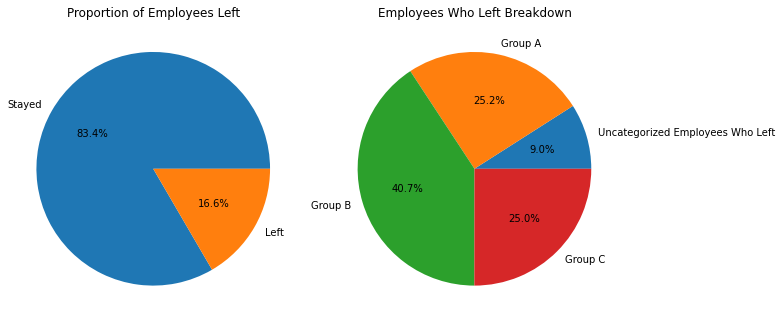

did not leave: 83.396%, raw: 10000
left: 16.604%, raw: 1991


In [28]:
#Finding Out How Groups A, B, and C represent the overall amount of "leavers"

total_left = df[df['did_leave'] == 1]['satisfaction_level'].count()
total_A = groupA['satisfaction_level'].count()
total_B = groupB['satisfaction_level'].count()
total_C = groupC['satisfaction_level'].count()
total_ABC = total_A + total_B + total_C
total_unaccounted = total_left - total_ABC

fig, ax = plt.subplots(1, 2, figsize=(11,11))

data = [total_unaccounted, total_A, total_B, total_C]

labels = ['Uncategorized Employees Who Left', 'Group A', 'Group B', 'Group C']

ax[1].pie(data, labels = labels, autopct='%1.1f%%')
ax[1].set_title('Employees Who Left Breakdown')

ax0_labels = ['Stayed', 'Left']
ax[0].pie(df['did_leave'].value_counts(), labels=ax0_labels, autopct='%1.1f%%')
ax[0].set_title('Proportion of Employees Left')

plt.tight_layout()
plt.show()

#Displaying raw numbers
category_names = ['did not leave', 'left']
percent_from_whole(data=df, column_name='did_leave', n_round=3, category_names=category_names)

# Understanding Group Size
- To review 16.6% (1991/11991) of employees chose to leave the company

- Categorizing these employees into either Group A, B, or C effectively categorizes ~91% (1811/1991) of these employees into a group
- Only ~179 employees who left unclassified by these key attributes.
- Groups A and C are similarly sized each representing 25% of the employees who left respectively ( ~500 employees each )
- Group B represents the largest group representing ~41% of employees who left ( ~815 employees )

# Anaylzing Key Characteristics of Each Group:

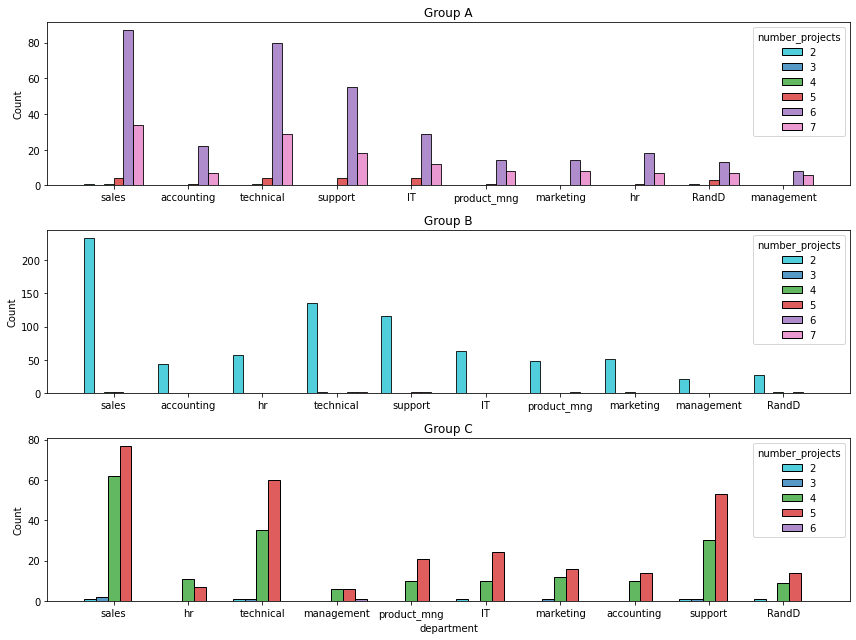

In [29]:
# Number of Projects per Group

fig, ax = plt.subplots(3, 1, figsize=(12,9))

#custom_palette1 = ["#1f77b4", "#2ca02c", "#d62728", "#9467bd", "#e377c2"]

#6 Color Palette
custom_palette2 = ["#17becf", "#1f77b4", "#2ca02c", "#d62728", "#9467bd", "#e377c2"]
#5 Color Palette
custom_palette3 = ["#17becf", "#1f77b4", "#2ca02c", "#d62728", "#9467bd"]

sns.histplot(x=groupA['department'], hue=groupA['number_projects'], multiple='dodge', shrink=.8, ax = ax[0], \
             palette=custom_palette2)
ax[0].set_xlabel('')
ax[0].set_title('Group A')

sns.histplot(x=groupB['department'], hue=groupB['number_projects'], multiple='dodge', shrink=.8, ax = ax[1], \
            palette=custom_palette2)
ax[1].set_xlabel('')
ax[1].set_title('Group B')


sns.histplot(x=groupC['department'], hue=groupC['number_projects'], multiple='dodge', shrink=.8, ax = ax[2], \
            palette=custom_palette3)
ax[2].set_title('Group C')

plt.tight_layout()
plt.show()

# Analysis of Projects by Each Group

## Group A:
- Group A typically worked on 6-7 projects confirming our previous hypothesis
- Some members of Group A worked on 5 projects.
- Large spread in project numbers for Group A, so some members are working 225+ hours on just 2-3 projects

## Group B:
- Group B almost strictly worked on 2 projects
- However, large spread in project numbers for Group B, so some members are working just 120-160 hours on 6-7 projects

## Group C:
- Group C almost strictly worked on 4-5 projects
- However, still relatively large spread in project numbers for Group B, so some members are working just 210-280 hours on any number of projects less than 7

## Takeaways:
- Working on 4-5 projects correlates with much higher levels of satisfaction than 6-7 projects.
> - We know this since Group C is much more satisfied than Group A
- Working on 4-5 projects is still a heavy workload, but much more managable than 6-7 projects. 
> - People still leave under this workload
> - People are much more satisfied than working on 6-7 projects
- Working on 2 projects, or too little hours causes employees to feel dissatisfied and leave the company.

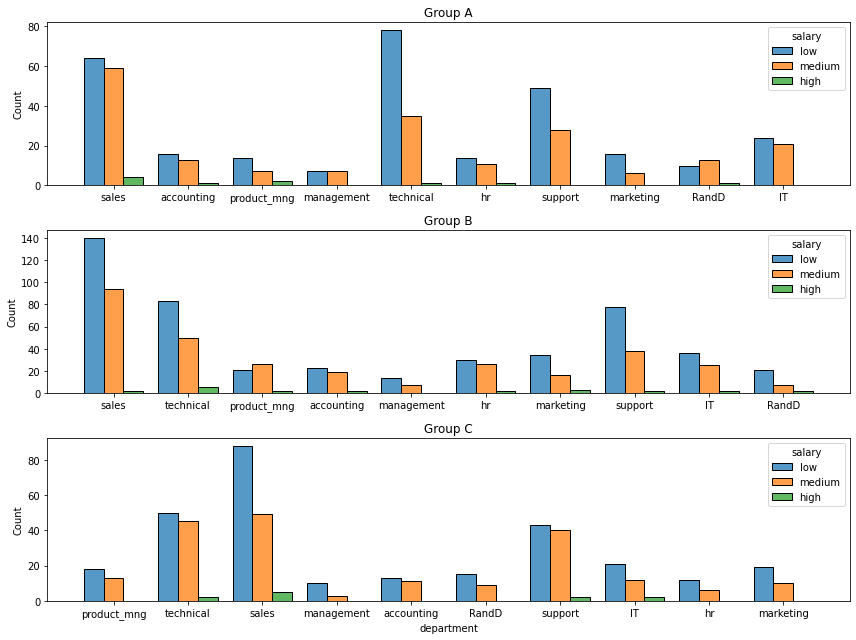

In [30]:
#Anaylsis of Salary Type by Group

groupA.groupby('department')['salary'].value_counts()

salary_order = ['low', 'medium', 'high']
custom_colors = {'low': 'b', 'medium': 'o', 'high': 'g'}

local_A = groupA.sort_values(by='salary', key=lambda x: x.map({s: i for i, s in enumerate(salary_order)}))
local_B = groupB.sort_values(by='salary', key=lambda x: x.map({s: i for i, s in enumerate(salary_order)}))
local_C = groupC.sort_values(by='salary', key=lambda x: x.map({s: i for i, s in enumerate(salary_order)}))

fig, ax = plt.subplots(3, 1, figsize=(12,9))

sns.histplot(x=local_A['department'], hue=local_A['salary'], multiple='dodge', shrink=.8, ax=ax[0])
ax[0].set_xlabel('')
ax[0].set_title('Group A')

sns.histplot(x=local_B['department'], hue=local_B['salary'], multiple='dodge', shrink=.8, ax=ax[1])
ax[1].set_xlabel('')
ax[1].set_title('Group B')

sns.histplot(x=local_C['department'], hue=local_C['salary'], multiple='dodge', shrink=.8, ax=ax[2])
ax[2].set_title('Group C')

plt.tight_layout()
plt.show()

# Analysis of Salary by Each Group

- Overall the salary spread between groups remains unclear
- Further deep-analysis on a department by department basis would be required to identify underlying trends

**One Useful Insight: Despite Groups A and C working far more average hours than Group B, their salary spreads appear similar**

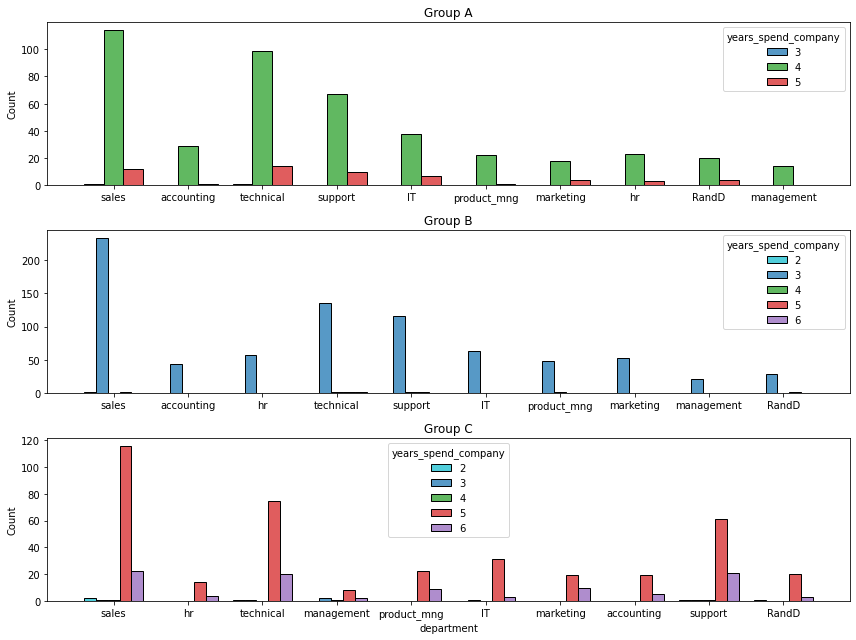

In [31]:
#Years Spent Sailfort per Group

fig, ax = plt.subplots(3, 1, figsize=(12,9))

#5 Color Palette
custom_paletteA = ["#17becf", "#1f77b4", "#2ca02c", "#d62728", "#9467bd"]
#3 Color Palette
custom_paletteB = ["#1f77b4", "#2ca02c", "#d62728"]

sns.histplot(x=groupA['department'], hue=groupA['years_spend_company'], multiple='dodge', shrink=.8, ax=ax[0], \
            palette=custom_paletteB)
ax[0].set_xlabel('')
ax[0].set_title('Group A')

sns.histplot(x=groupB['department'], hue=groupB['years_spend_company'], multiple='dodge', shrink=.8, ax=ax[1], \
            palette=custom_paletteA)
ax[1].set_xlabel('')
ax[1].set_title('Group B')

sns.histplot(x=groupC['department'], hue=groupC['years_spend_company'], multiple='dodge', shrink=.8, ax=ax[2], \
            palette=custom_paletteA)
ax[2].set_title('Group C')

plt.tight_layout()
plt.show()

# Analysis of Years Spent at Sailfort Motors by Each Group

## Group A:
- Typically worked for 4 years, sometimes 5
- Tiny spread in years worked at the company for Group A, so members of this group always leave the company at similar times

## Group B:
- Group B almost strictly left the company after 2 years of work.
- Larger spread in years worked for Group B. 
> Possibly few people who are okay with working less, or recently began working less in the last couple of years and left

## Group C:
- Group C almost strictly worked for 5-6 years.
> - On average the members of this group worked 1-2 years longer than Group A, probably due to higher levels of satisfaction
> - Similar salary spread as Group A, despite similar working hours and longer tenure.
- Larger spread in years worked for Group C.


## Takeaways:
- Employees burnout quickly when working on 6-7 projects.
- Working on 4-5 projects is still a heavy workload, but more sustainable. 
- Group B left the quickest, indicating a underwhelming workload may strongly cause people to leave.

In [32]:
#Creation of Groups DF

groupA['group_label'] = 'Group_A'
groupB['group_label'] = 'Group_B'
groupC['group_label'] = 'Group_C'

groups_df = pd.concat([groupA, groupB, groupC], ignore_index=True)

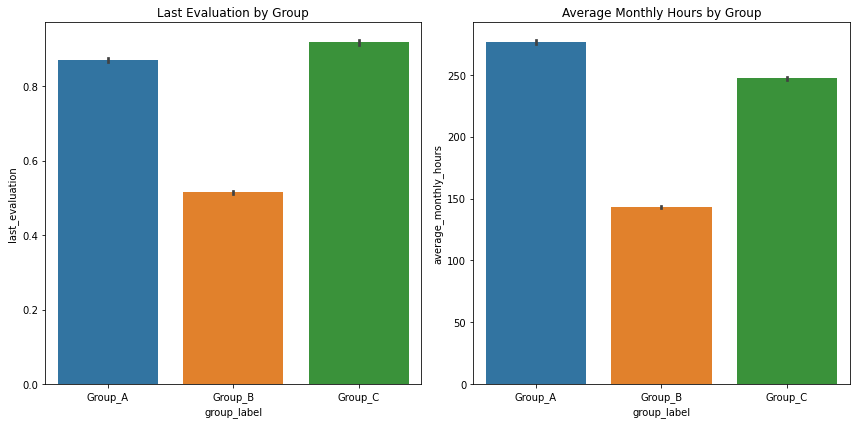

Company Mean Last Evaluation 0.72
Company Standard Deviation of Last Evaluation 0.17


In [33]:
#Evaluation by Group

fig, ax = plt.subplots(1, 2, figsize=(12,6))

sns.barplot(x=groups_df['group_label'], y=groups_df['last_evaluation'], ax=ax[0])
ax[0].set_title('Last Evaluation by Group')

sns.barplot(x=groups_df['group_label'], y=groups_df['average_monthly_hours'], ax=ax[1])
ax[1].set_title('Average Monthly Hours by Group')

plt.tight_layout()
plt.show()

mean_last = df['last_evaluation'].mean()
mean_std = df['last_evaluation'].std()

print(f'Company Mean Last Evaluation {mean_last:.2f}')
print(f'Company Standard Deviation of Last Evaluation {mean_std:.2f}')

## Evaluation Scores and Average Monthly Hours by Group

- Workers from Group C outperformed workers from Group A
> - Despite working more hours Group A underperformed compared to Group C
> - Suggesting higher satisfaction levels and a lower workload are associated with a higher quality of work
- Workers from Group B underperformed both Group A and Group C
> - Despite Group B working far less hours than Groups A and C their quality of work was less
> - Demanding too little from workers can be associated with decreased quality of work, burnout and wanting to leave

#### Workers from Groups A and B are scoring more than a standard deviation above the mean in last evaluation scores
> **Sailfort Motors is losing some of its best employees in these groups**

## Takeaways from Group Analysis Section

1.
- If employees are overworked or underworked they will generally be dissatisfied and leave the company

2.
- More working hours is not neccessarily associated with higher evaluation scores or higher work quality
- Neither is too few working hours

3.
- Employees who work more are not necessarily given promotions or raises due to their hard work
- Employees who are overworked are often paid the same as those who are underworked
> - This could cause animosity or dissatisfaction the work enviornment

4.
- **Many of Sailfort Motor's best employees are leaving due to mismanagement**
- **Many of Sailfort Motor's employees are leaving due to being underutilized**

### Sailfort Motors should figure out ways to better manage projects and assign employees appropriate amounts of work to avoid burnout and retain their strongest employees
> Additionally Sailfort Motors should consider implementing a promotion structure to increase retainment of strong performers.

# Department Metrics:

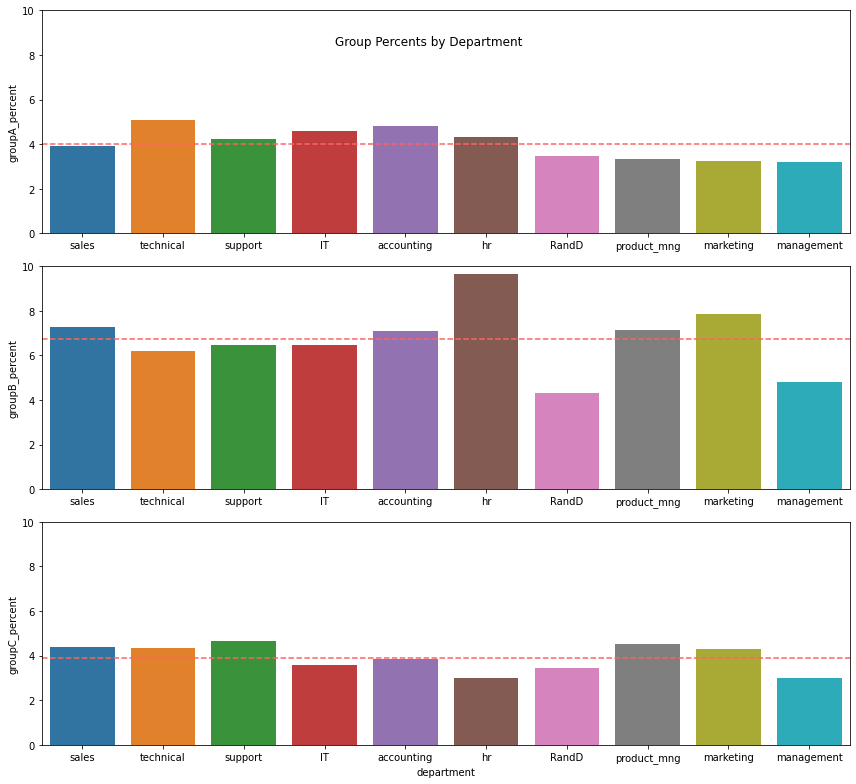

In [34]:
#GroupA, GroupB Department Distribution

fig, ax = plt.subplots(3, 1, figsize=(12,11))

#Group A
sns.barplot(x=departments_df['department'], y=departments_df['groupA_percent'],ax = ax[0])
ax[0].axhline(y=departments_df['groupA_percent'].mean(), color='#ff6361', label='Company Mean', ls='--')
ax[0].set_ylim(0, 10)
ax[0].set_xlabel('')

#Group B
sns.barplot(x=departments_df['department'], y=departments_df['groupB_percent'],ax = ax[1])
ax[1].axhline(y=departments_df['groupB_percent'].mean(), color='#ff6361', label='Company Mean', ls='--')
ax[1].set_ylim(0, 10)
ax[1].set_xlabel('')

#Group C
sns.barplot(x=departments_df['department'], y=departments_df['groupC_percent'],ax = ax[2])
ax[2].axhline(y=departments_df['groupC_percent'].mean(), color='#ff6361', label='Company Mean', ls='--')
ax[2].set_ylim(0, 10)

fig.suptitle('Group Percents by Department', y = 0.95)

plt.tight_layout()
plt.show()

### Group A Percent:
##### A high Group A percent might indicate that a department is generally overworked and dissatisfied with their work
- Highest Group A Percent Departments: Technical, Accounting, IT, HR, Support

### Group B Percent:
##### A high Group B percent might indicate that a department is underutilizing their employees skillsets causing dissatisfaction
- Highest Group B Percent Departments: HR, Marketing, Sales, Product Management

### Group C Percent:
#### A high Group C percent might indicate that a department is relying too heavily on their best, most consistent workers despite generally high department satisfaction
- Highest Group C Percent Departments: Support, Product Management, Technical, Marketing, Sales

### Combinations of these percents give further insight department conditions
- Ex: HR has a high combination of both Group A and Group B, this might indicate that their strongest workers are extremely overworked, while their general workforce is underworked, showcasing extreme inefficiency in department management.

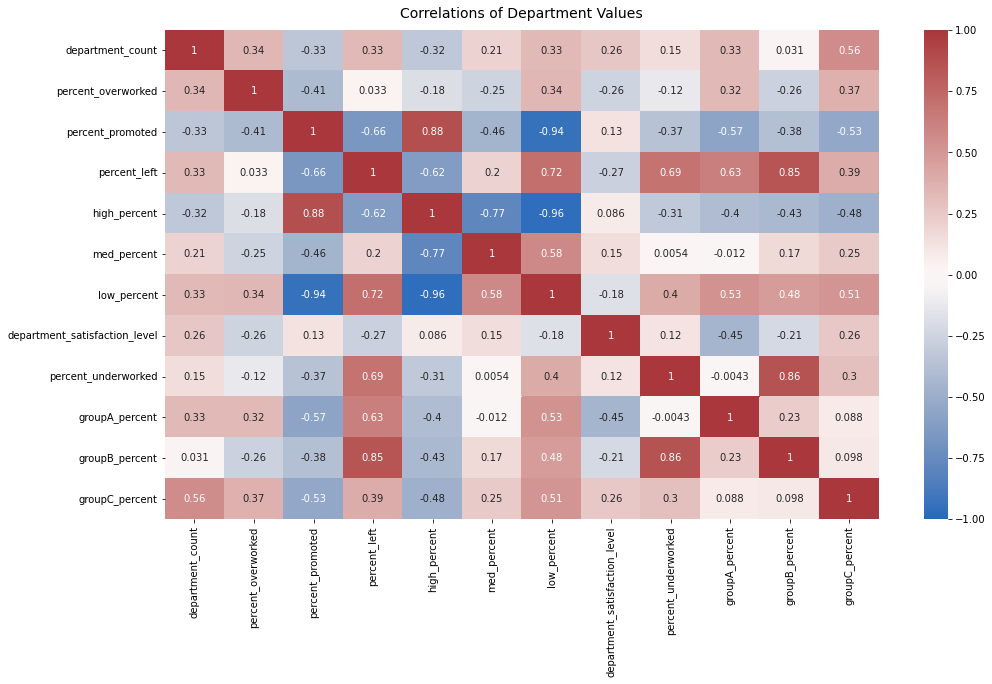

In [35]:
heat_df = departments_df.drop(columns = ['groupA_Count', 'groupB_Count', 'groupC_Count'])

plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(heat_df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlations of Department Values', fontdict={'fontsize':14}, pad=12);

# Department Metrics Heatmap Analysis

#### Analyzing correlations between department metrics gives insight into understanding relationships between department factors

## Notable Correlations:

### High Positive Correlations:
- Department Count ~ Group C Percentage
- Percentage Overworked ~ Group A/C Percentage
- Percentage Left ~ Group A/B/C Percentage
- Percentage Left ~ Percentage Low Salary
- Percentage Left ~ Percent Underworked
- Percentage Underworked ~ Group B Percent


### High Negative Correlations:
- `Percent Overworked` ~ `Percent Promoted`
- `Percent Promoted1` ~ Group A/B/C Percentages
- `Percent Promoted` ~ `Percent Left`
- `Department Satisfaction Level` ~ Group A/B Percent


### Low Correlations:
- `Percent Overworked` ~ `Percent Left`
- Percent Promoted ~ Department Satisfaction Level
- High Salary Percentage ~ Department Satisfaction Level
- Percent Underworked ~ Group A Percent

##### Note: Other correlations not noted may provide further insight

# Accidents

- Accidents played no significant role in satisfaction levels, indicating the company handles accidents well. 
- Considering this, likely does not significantly affect whether an employee stays or leaves the company.

# Key Insights from EDA:

Employees who work on more projects generally work more hours. Often employees who work more hours receive higher grades on evaluation reports up until an extent. If employees are too overworked, the quality of their work usually declines with their satisfaction levels possibly causing them to leave the company. There is also a large portion of employees who leave the company for the contrary reason, not having enough work. Having a large group of employees leaving due to being overworked, while having an equally large number of employees leaving due to being underworked may indicate inefficiencies at the behest of management. Employees who are overworked should be limited, while employees who are underworked need to be assigned more. Optimizing this imbalance should be conducted both company wide, and on a department to department basis to ensure employees skillsets are utilized efficiently. Sailfort Motors is over reliant on some of its best employees causing them to leave while simultaneously underutilizing other employees who could help on these projects. Perhaps the company should more closely monitor how many projects employees are working on, and even limit the amount of projects employees work on to help retain strong performers and increase workplace efficiency. 

Additionally, it is notable that employees which are overworked and high performers tend to leave between 4-6 years. While underutilized employeees tend to leave after only 3. Considering that employees are far less likely to leave after a promotion, perhaps Sailfort Motors should consider implementing some sort of standardized promotion structure to ensure it will retain strong performers, this may also intrinsically encourage underperformers to take more initiative and improve their own performance.

Using department metrics we can better analyze the needs in each department to optimize, address inefficiencies and correct managerial oversights.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Goal: Create a model to predict the binary outcome of the did_leave variable (1 or 0). Predict whether a employees will leave.

1. Create a Logisitic Regression Model to predict this outcome.
2. Create a tree-based model to predict this outcome.
3. Use K-Means clustering to gain further insight into the different groups of employees which are leaving. 

### Identify the types of models most appropriate for this task.

1. Logistic Regression Model
2. Tree-based models

### Modeling

Add as many cells as you need to conduct the modeling process.

# Begin Model Building:

## Encoding categorical/hierarchical columns

In [36]:
#Copying DF

df_encoded = df.copy()

# Encode the `salary` column as an ordinal numeric category
df_encoded['salary'] = (
    df_encoded['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_encoded = pd.get_dummies(df_encoded, drop_first=False)

# Display the new dataframe
df_encoded.tail(10)

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,years_spend_company,bool_accident,did_leave,promotion_last_5years,salary,z_score_tenure,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
11981,0.49,0.49,4,212,7,0,0,0,1,2.732698,0,0,0,0,0,0,1,0,0,0
11982,0.60,0.53,2,235,7,0,0,0,1,2.732698,1,0,0,0,0,0,0,0,0,0
11983,0.62,0.85,3,237,3,1,0,0,1,-0.274279,1,0,0,0,0,0,0,0,0,0
11984,0.64,0.50,4,253,10,0,0,1,2,4.987931,0,0,0,0,1,0,0,0,0,0
11985,0.22,0.94,3,193,10,0,0,1,2,4.987931,0,0,0,0,1,0,0,0,0,0
11986,0.90,0.55,3,259,10,1,0,1,2,4.987931,0,0,0,0,1,0,0,0,0,0
11987,0.74,0.95,5,266,10,0,0,1,2,4.987931,0,0,0,0,1,0,0,0,0,0
11988,0.85,0.54,3,185,10,0,0,1,2,4.987931,0,0,0,0,1,0,0,0,0,0
11989,0.33,0.65,3,172,10,0,0,1,2,4.987931,0,0,0,0,0,1,0,0,0,0
11990,0.50,0.73,4,180,3,0,0,0,0,-0.274279,1,0,0,0,0,0,0,0,0,0


### Heatmap to better understand correlations of continuous/discrete variables

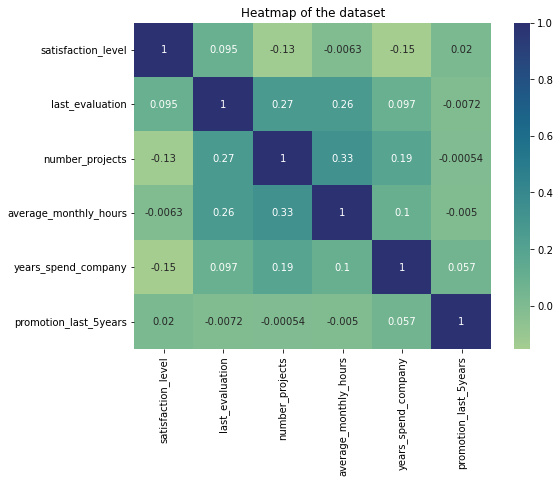

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_encoded[['satisfaction_level', 'last_evaluation', 'number_projects', 'average_monthly_hours', 'years_spend_company', \
                       'promotion_last_5years']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

### Verifying bool_accident is statistically insignificant

In [38]:
from scipy.stats import pointbiserialr
import random

data1 = df[df['bool_accident']==0]['did_leave']
data2 = df[df['bool_accident']==1]['did_leave']

if len(data1) > len(data2):
    # Randomly sample data1 to match the length of data2
    random.seed(42)
    data1 = np.array(random.sample(data1.tolist(), len(data2)))

correlation, p_value = pointbiserialr(data1, data2)

print(f"Point-Biserial Correlation: {correlation:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpret the result
if p_value < 0.05:
    print("There is a statistically significant correlation.")
else:
    print("There is no statistically significant correlation.")

Point-Biserial Correlation: 0.0163
P-Value: 0.4835
There is no statistically significant correlation.


- Since the P-Value: 0.4835 is very large, we conclude having an accident is insignificant in its effect on leaving the company.

# Creating a K-Means Clustering Model

#### Validating "Groups" of employees who left using K-Means Clusters

- By using K-Means Clustering on employees who did leave maybe we can further our understanding of different reasons for leaving.

In [39]:
# Important tools for K-Means modeling and evaluation.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [40]:
# First Use K-Means Clustering on Employees Who Left To Create Labels

# Drop Departments from dataset, want to confirm if employees who left exhibit different characteristics 
# based on their work conditions NOT department.

#Drop Bool_Accident because insignificant

#Drop Number_Projects because Highly Correlated with Average_Monthly Hours

#Drop Did_Leave because given

#Drop Promotion Status Due to Being Binary

#Dropped Columns

df_kmeans = df_encoded.drop(columns = ['z_score_tenure' , 'department_IT', 'department_RandD','department_accounting' ,'department_hr' \
                                      , 'department_management', 'department_product_mng', 'department_sales', \
                                      'department_support', 'department_technical', 'department_marketing', 'bool_accident', \
                                        'number_projects', 'promotion_last_5years'])

# Selecting Only Employees Who Left

df_kmeans = df_kmeans[df_kmeans['did_leave'] == 1]

#Dropping Did_Leave

df_kmeans = df_kmeans.drop(columns='did_leave')

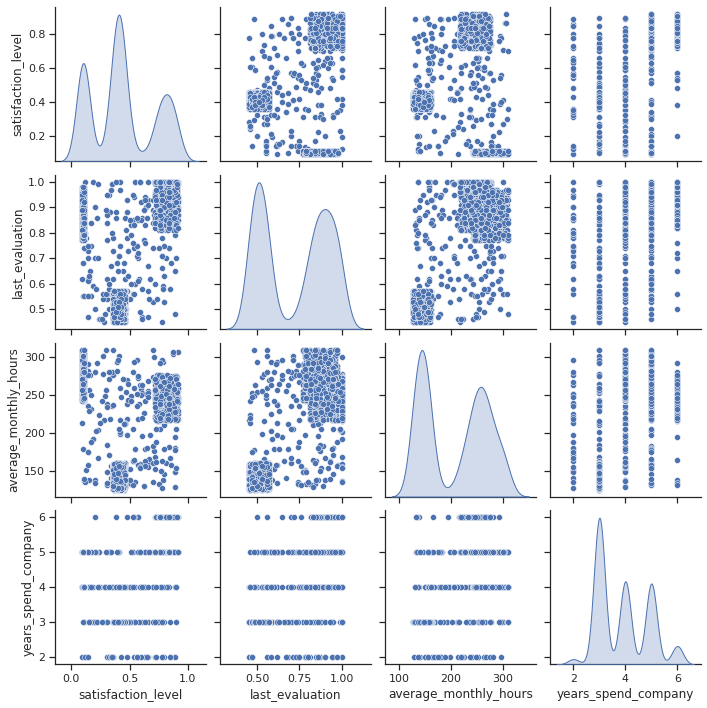

In [41]:
# Checking Multicollinearity Assumption

#Dropping Salary because Hierarchical
df_multi_kmeans = df_kmeans.drop(columns='salary')

sns.set(style="ticks")
sns.pairplot(df_multi_kmeans, diag_kind='kde')
plt.show()

- No apparent multicollinearity between variables, so we can proveed

In [42]:
# Scaling the Data for the Model
kmeans_scaled = StandardScaler().fit_transform(df_kmeans)

In [43]:
# Fit K-means and evaluate inertia for different values of k.

num_clusters = [i for i in range(2, 11)]

def kmeans_inertia(num_clusters, x_vals):
    inertia_list = []
    for num in num_clusters:
        kmeans = KMeans(n_clusters=num, random_state=42)
        kmeans.fit(x_vals)
        inertia_list.append(kmeans.inertia_)
    return inertia_list

In [44]:
# Return a list of inertia for k=2 to 10.

inertia = kmeans_inertia(num_clusters, x_vals=kmeans_scaled)

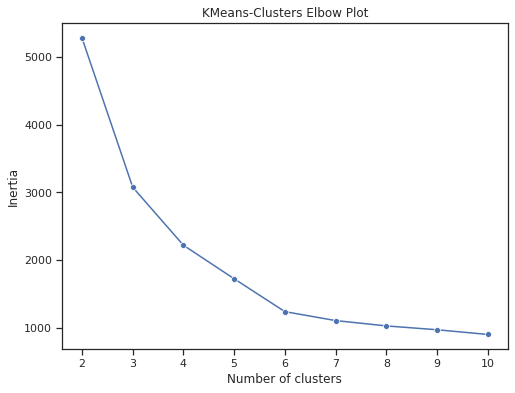

In [45]:
#Elbow Plot to Find Correct K-Value

plt.figure(figsize=(8,6))

sns.lineplot(x=num_clusters, y=inertia, marker = 'o')
plt.xlabel("Number of clusters");
plt.ylabel("Inertia");
plt.title('KMeans-Clusters Elbow Plot')
plt.show()

- 6 appears to be the best K-value

In [46]:
# Evaluate silhouette score.
# Writing a function to return a list of each k-value's score.

def kmeans_silhouette(num_clusters, x_vals):
    silhouette_list = []
    for num in num_clusters:
        kmeans = KMeans(n_clusters=num, random_state=42)
        kmeans.fit(x_vals)
        silhouette_list.append(silhouette_score(x_vals, kmeans.labels_))
    return silhouette_list

In [47]:
#Evaluating Silhouette Score

sil_score = kmeans_silhouette(num_clusters, x_vals=kmeans_scaled)

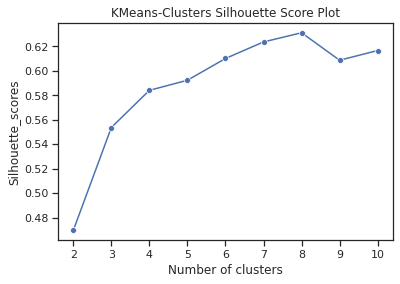

In [48]:
#Creating Plot

sns.lineplot(x=num_clusters, y=sil_score, marker = 'o')
plt.xlabel("Number of clusters");
plt.ylabel("Silhouette_scores");
plt.title('KMeans-Clusters Silhouette Score Plot')
plt.show()

- 8 has the best silhouette score
- Since K-Values of 6 and 8 yielded the best results, choose the average of 7. 
- **K-Value: 7**

In [49]:
#Fit 7-cluster Model

kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(kmeans_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [50]:
# Print unique labels.

print(np.unique(kmeans.labels_))

[0 1 2 3 4 5 6]


In [51]:
#Adding Back Departments and Adding Labels to DF for Later Grouping
df_kmeans_dept = df.drop(columns = ['z_score_tenure' ,'bool_accident', \
                                        'number_projects', 'promotion_last_5years'])

df_kmeans_dept = df_kmeans_dept[df_kmeans_dept['did_leave'] == 1]

df_kmeans_dept['cluster'] = kmeans.labels_

## Evaluating K-Means Clusters Results

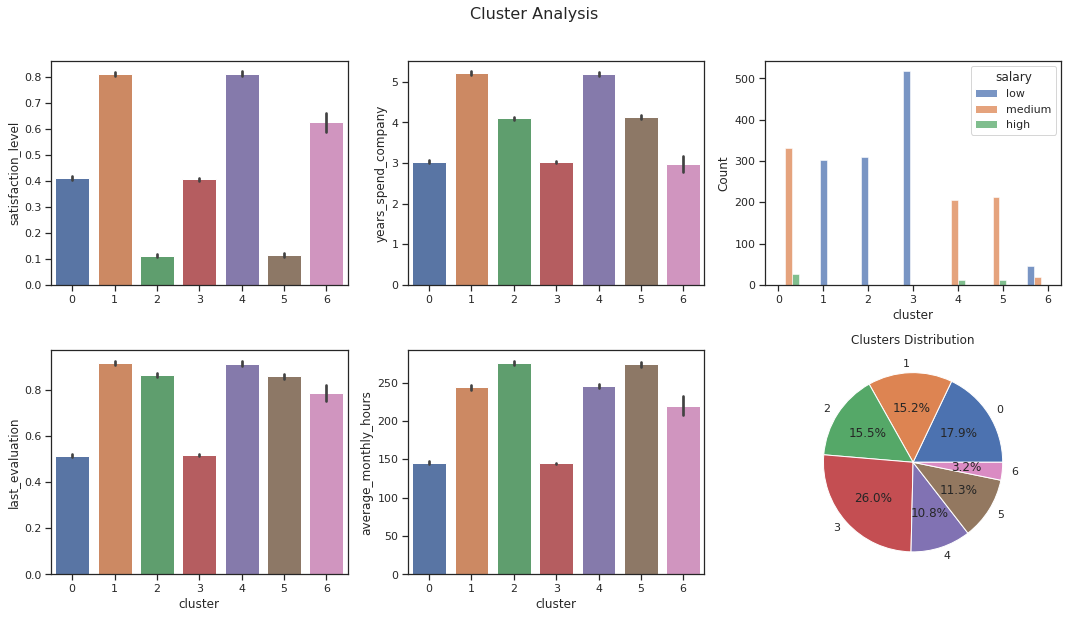

In [52]:
fig, ax = plt.subplots(2, 3, figsize=(15,8))

#fig.suptitle('Yess', fontsize=16)
plt.figtext(0.5, 1.05, "Cluster Analysis", fontsize=16, ha='center')

sns.barplot(x=df_kmeans_dept['cluster'], y=df_kmeans_dept['satisfaction_level'], ax=ax[0, 0])
ax[0,0].set_xlabel('')
sns.barplot(x=df_kmeans_dept['cluster'], y=df_kmeans_dept['last_evaluation'], ax=ax[1, 0])
sns.barplot(x=df_kmeans_dept['cluster'], y=df_kmeans_dept['years_spend_company'], ax=ax[0, 1])
ax[0,1].set_xlabel('')
sns.barplot(x=df_kmeans_dept['cluster'], y=df_kmeans_dept['average_monthly_hours'], ax=ax[1, 1])
sns.histplot(x=df_kmeans_dept['cluster'], hue=df_kmeans_dept['salary'], multiple='dodge', ax=ax[0, 2])
ax[1,2].pie(x=df_kmeans_dept.groupby(['cluster'])['satisfaction_level'].count(), labels = [i for i in range(7)], autopct='%1.1f%%')
ax[1,2].set_title('Clusters Distribution')

plt.tight_layout()
plt.show()

### Pairs of clusters (0, 3), (1, 4), and (2, 5) yielded identical results aside from salary
- K-Means does not handle hierarchical data well, so the separation of these groups is solely due to salary type
- This supports our original hypothesis of the existence of 3 main groups (Groups: A,B,C) in employees who left
- Label 6 is the only label with unique values, could correspond to the previously ungrouped members
#### Hard to Determine the Impact of salary from this analysis

#### Regrouping Data Based on Cluster Label and Plotting New Groups
- Labels (2, 5) = Group A
- Labels (0, 3) = Group B
- Labels (1, 4) = Group C
- Label 6 = Group D

In [53]:
# Define the 'group_label' based on K-Means cluster classification

df_kmeans_dept['group_label'] = 'Other'  # Initialize with a default label
df_kmeans_dept.loc[(df_kmeans_dept['cluster'] == 2) | (df_kmeans_dept['cluster'] == 5), 'group_label'] = 'GroupA'
df_kmeans_dept.loc[(df_kmeans_dept['cluster'] == 0) | (df_kmeans_dept['cluster'] == 3), 'group_label'] = 'GroupB'
df_kmeans_dept.loc[(df_kmeans_dept['cluster'] == 1) | (df_kmeans_dept['cluster'] == 4), 'group_label'] = 'GroupC'
df_kmeans_dept.loc[(df_kmeans_dept['cluster'] == 6), 'group_label'] = 'GroupD'

df_kmeans_dept=df_kmeans_dept.sort_values(by='group_label')

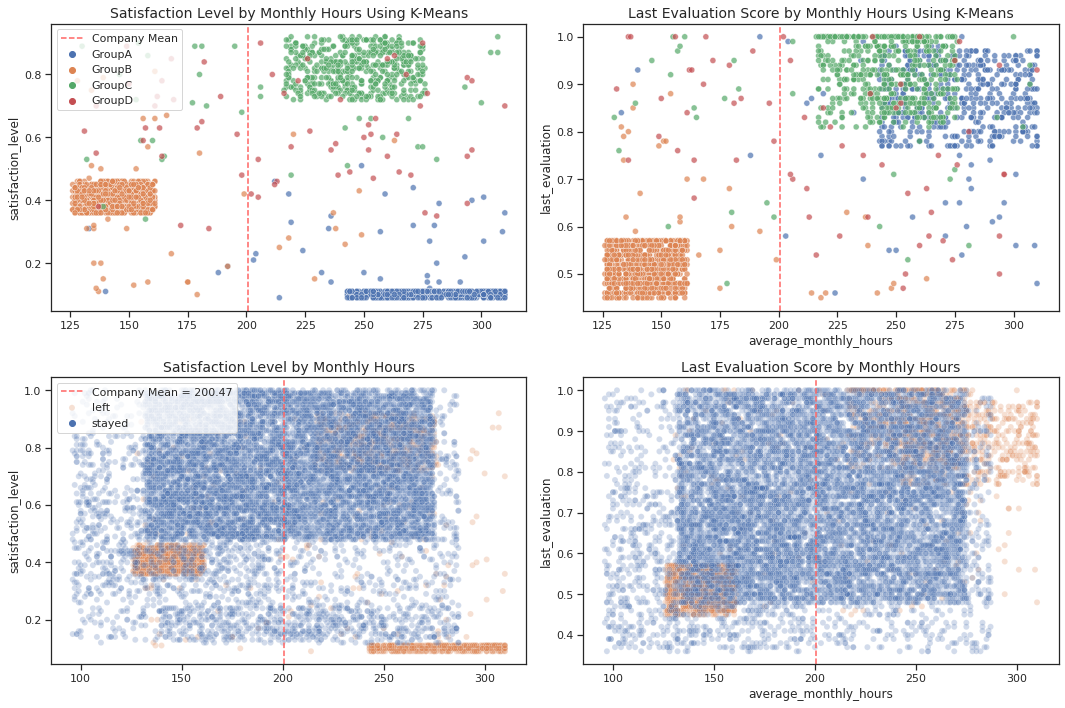

In [54]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))

#Figure 1
sns.scatterplot(data=df_kmeans_dept, x='average_monthly_hours', y='satisfaction_level', hue='group_label', alpha=0.7, ax=ax[0,0])
ax[0,0].axvline(x=200.47, color='#ff6361', label='Company Mean', ls='--')
ax[0,0].legend(loc='upper left')
ax[0,0].set_title('Satisfaction Level by Monthly Hours Using K-Means', fontsize='14');\
ax[0,0].set_xlabel("")

#Figure 2
sns.scatterplot(data=df_kmeans_dept, x='average_monthly_hours', y='last_evaluation', hue='group_label', alpha=0.7, ax = ax[0,1])
ax[0,1].axvline(x=200.47, color='#ff6361', label='Company Mean', ls='--')
ax[0,1].legend().set_visible(False)
ax[0,1].set_title('Last Evaluation Score by Monthly Hours Using K-Means', fontsize='14');

#Figure 3
sns.scatterplot(data=df, x='average_monthly_hours', y='satisfaction_level', hue='did_leave', alpha=0.25, ax=ax[1,0])
ax[1,0].axvline(x=200.47, color='#ff6361', label='Company Mean', ls='--')
ax[1,0].legend(labels=['Company Mean = 200.47', 'left', 'stayed'], loc = 'upper left')
ax[1,0].set_title('Satisfaction Level by Monthly Hours', fontsize='14');\
ax[1,0].set_xlabel("")

#Figure 4
sns.scatterplot(data=df, x='average_monthly_hours', y='last_evaluation', hue='did_leave', alpha=0.25, ax = ax[1,1])
ax[1,1].axvline(x=200.47, color='#ff6361', label='Company Mean', ls='--')
ax[1,1].legend(labels=['Company Mean = 200.47', 'left', 'stayed'])
ax[1,1].legend().set_visible(False)
ax[1,1].set_title('Last Evaluation Score by Monthly Hours', fontsize='14');

plt.tight_layout()
plt.show()

- New method of grouping through labels makes clearer distinction of groups on scatterplot
- Reinforces previous analysis

# Building a Random Forest Model:

In [55]:
# Dropping Multicollinear Columns, and Bool_Accidedent
df_encoded = df_encoded.drop(columns=['z_score_tenure', 'number_projects', 'bool_accident'])

**Splitting the Data into 70/15/15 split:**

In [56]:
# Split the data into a training set (70%), a validation set (15%), and a holdout set (15%)

X = df_encoded.drop(columns=['did_leave'])
y = df_encoded['did_leave']

X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Then, split the temporary data into validation (15%) and holdout (15%)
X_validation, X_holdout, y_validation, y_holdout = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Reset the indices for the resulting DataFrames
X_train_temp = X_train_temp.reset_index(drop=True) #Training Data X
X_validation = X_validation.reset_index(drop=True) #Validation Data X
X_holdout = X_holdout.reset_index(drop=True) #Holdout Data X
y_train_temp = y_train_temp.reset_index(drop=True) #Training Data y
y_validation = y_validation.reset_index(drop=True) #Validation Data y
y_holdout = y_holdout.reset_index(drop=True) #Holdout Data y

#### Testing for Multicollinearity

In [57]:
# Writing Function to Test for Statistically Significant Correlations

def test_discrete_vs_discrete(variable1, variable2, method='pearson'):
    if method == 'pearson':
        correlation, p_value = stats.pearsonr(variable1, variable2)
        if p_value < 0.05:
            print(f"There is a statistically significant correlation between {variable1.name} and {variable2.name}.")
            print(f"Correlation Coefficient: {correlation:.4f}")
        else:
            print(f"There is NOT a statistically significant correlation between {variable1.name} and {variable2.name}.")
    elif method == 'spearman':
        correlation, p_value = stats.spearmanr(variable1, variable2)
        if p_value < 0.05:
            print(f"There is a statistically significant correlation between {variable1.name} and {variable2.name}.")
            print(f"Correlation Coefficient: {correlation:.4f}")
        else:
            print(f"There is NOT a statistically significant correlation between {variable1.name} and {variable2.name}.")
    else:
        raise ValueError("Invalid method. Use 'pearson' or 'spearman'.")

In [58]:
# Making Sure Number_projects and average_monthly_hours are significantly correlated

test_discrete_vs_discrete(variable1=df['number_projects'], variable2=df['average_monthly_hours'])

There is a statistically significant correlation between number_projects and average_monthly_hours.
Correlation Coefficient: 0.3315


#### Random Forest Model Building and Hyperparameter Tuning using GridSearchCV

In [59]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import time

"""#Instantiate Model
rf = RandomForestClassifier(random_state=42)

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Create a RandomForestClassifier and define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 300, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2,3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Create GridSearchCV with AUC-ROC scoring
grid_search_forest1 = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=scoring, cv=5, \
                                 verbose=True, n_jobs=-1, refit='roc_auc')

# Fit the GridSearchCV to your data
grid_search_forest1.fit(X_train_temp, y_train_temp)  # Replace X and y with your feature matrix and target variable

# Print the best hyperparameters and corresponding AUC-ROC score
print("Best Hyperparameters:", grid_search_forest1.best_params_)
print("Best AUC-ROC Score:", grid_search_forest1.best_score_)
results = grid_search_forest1.cv_results_"""


CPU times: user 700 µs, sys: 455 µs, total: 1.15 ms
Wall time: 43.9 µs


'#Instantiate Model\nrf = RandomForestClassifier(random_state=42)\n\n# Assign a dictionary of scoring metrics to capture\nscoring = {\'accuracy\', \'precision\', \'recall\', \'f1\', \'roc_auc\'}\n\n# Create a RandomForestClassifier and define the hyperparameter grid\nparam_grid = {\n    \'n_estimators\': [100, 300, 300, 500],\n    \'max_depth\': [None, 10, 20],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'min_samples_split\': [2,3, 4, 5],\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\'],\n}\n\n# Create GridSearchCV with AUC-ROC scoring\ngrid_search_forest1 = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=scoring, cv=5,                                  verbose=True, n_jobs=-1, refit=\'roc_auc\')\n\n# Fit the GridSearchCV to your data\ngrid_search_forest1.fit(X_train_temp, y_train_temp)  # Replace X and y with your feature matrix and target variable\n\n# Print the best hyperparameters and corresponding AUC-ROC score\nprint("Best Hyperparameters:", grid_search_forest1.best

In [60]:
# Tuned Random Forest

grid_search_forest1 = RandomForestClassifier(random_state=42, max_depth=10, max_features='auto', min_samples_leaf=1, min_samples_split=4, n_estimators=100)
grid_search_forest1.fit(X_train_temp, y_train_temp)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### Best Hyperparameters for Random Forest:
- max_mepth: 10
- max_features: 'auto'
- min_samples_leaf: 1
- min_samples_split: 4
- n_estimators: 100

AUC-ROC Score: 0.9778

In [61]:
#Get Predictions Based on Validation Set

y_pred_rf = grid_search_forest1.predict(X_validation)

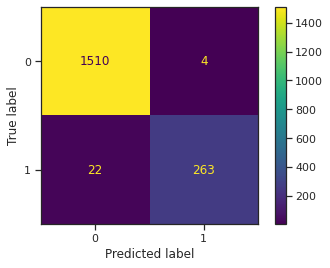

In [62]:
# Confusion Matrix

# Compute values for confusion matrix
rf_cm = confusion_matrix(y_validation, y_pred_rf, labels=grid_search_forest1.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, 
                                  display_labels=grid_search_forest1.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

The upper-left quadrant displays the number of true negatives.
The upper-right quadrant displays the number of false positives.
The bottom-left quadrant displays the number of false negatives.
The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

- **True Negatives: 1510**

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

- **False Positives: 4**

False negatives: The number of people who left that the model inaccurately predicted did not leave

- **False Negatives: 22**

True positives: The number of people who left the model accurately predicted as leaving

- **True Positives: 263**

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

In [63]:
# Writing a function to get model scores

def get_scores(model_name:str, model, X_test_data, y_test_data):
    preds = model.predict(X_test_data)
    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [64]:
# Random Forest Metrics

target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_validation, y_pred_rf, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.99      1.00      0.99      1514
    Predicted would leave       0.99      0.92      0.95       285

                 accuracy                           0.99      1799
                macro avg       0.99      0.96      0.97      1799
             weighted avg       0.99      0.99      0.99      1799



In [65]:
get_scores('grid_search_forest1', grid_search_forest1, X_validation, y_validation)

,model,precision,recall,f1,accuracy,AUC
0,grid_search_forest1,0.985019,0.922807,0.952899,0.985548,0.960083


## Evaluation using Validation (Test) Set:

### Random Forest Performance Metrics Weighted:
- 99% accuracy
- 99% precision
- 99% recall
- 99% F1-Score
- AUC-ROC Score: 97.78%

*It is worth noting this model performed worse when predicting people who 'would leave'. So the weighted averages are a bit skewed due to the dataset (and predictions) being imbalanced.*

### Random Forest Performance Metrics (Predicted Would Leave):
- 99% accuracy
- 99% precision
- 92% recall
- 95% F1-Score
- AUC-ROC Score: 96%

Overall, this model performed exceptionally well.

In [66]:
# Using Holdout Dataset

get_scores('grid_search_forest1', grid_search_forest1, X_holdout, y_holdout)

,model,precision,recall,f1,accuracy,AUC
0,grid_search_forest1,0.962457,0.886792,0.923077,0.973874,0.939683


### Evaluation Using Holdout Dataset

- 97.3% accurary
- 96.2% precision
- 88.6% recall
- 92.3% F1-Score
- AUC-ROC Score: 93.9%

Although these performance metrics dropped pretty significantly, the model still performed well. Displaying some level of robustness. 

### Random Forest Feature Importance

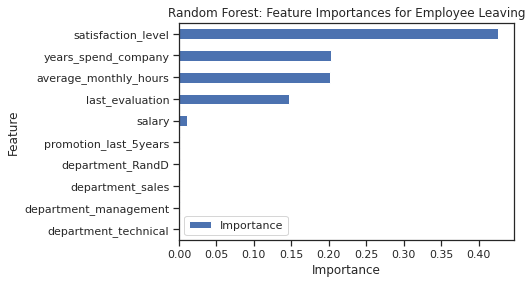

In [67]:
# Get feature importances
feat_impt = grid_search_forest1.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(grid_search_forest1.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot shows `satisfaction_level`, `years_spend_company`, `average_monthly_hours`, `last_evaluation`, and `salary` have the highest levels of importance (in that order). These variables are extremely helpful in predicting the outcome of `did_leave`. 

- Since random forest models are less prone to issues resulting from multicollinearity, it could be worth rebuilding the model including the `number_projects` variable.

# Building a Logistic Regression Model: 

In [68]:
outlier_detector('years_spend_company', 0.95)

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,years_spend_company,bool_accident,did_leave,promotion_last_5years,department,salary,z_score_tenure
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1.980954
17,0.78,0.99,4,255,6,0,1,0,sales,low,1.980954
34,0.84,0.87,4,246,6,0,1,0,hr,low,1.980954
47,0.57,0.70,3,273,6,0,1,0,support,low,1.980954
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium,1.980954
...,...,...,...,...,...,...,...,...,...,...,...
11985,0.22,0.94,3,193,10,0,0,1,management,high,4.987931
11986,0.90,0.55,3,259,10,1,0,1,management,high,4.987931
11987,0.74,0.95,5,266,10,0,0,1,management,high,4.987931
11988,0.85,0.54,3,185,10,0,0,1,management,high,4.987931


#### Logistic Regression Model Building and Hyperparameter Tuning using GridSearchCV

In [69]:
# Building and Tuning Model Using GridSearchCV

"""param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

clf = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)"""

"param_grid = [    \n    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],\n    'C' : np.logspace(-4, 4, 20),\n    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],\n    'max_iter' : [100, 1000,2500, 5000]\n    }\n]\n\nclf = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)"

In [70]:
#best_clf = clf.fit(X_train_temp,y_train_temp)

In [71]:
#best_params = clf.best_params_
#best_estimator = clf.best_estimator_

### Best hyperparameters for logistic regression model

best_params: 
- 'C': 0.03359818286283781
- 'max_iter': 2500 
- 'penalty': 'l1' 
- 'solver': 'saga'

In [72]:
# Build Model For Later Use
grid_search_lr1 = LogisticRegression(C=0.03359818286283781, max_iter = 2500, penalty = 'l1', solver = 'saga')

grid_search_lr1.fit(X_train_temp,y_train_temp)

# get coefficients
coefficients = grid_search_lr1.coef_

# get feature names
feature_names = X_train_temp.columns

# Create a DataFrame to associate feature names with their coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients[0]})

# Display or analyze the coefficients
print(coefficients_df)
print(f'Intercept:{grid_search_lr1.intercept_}')

                   Feature  Coefficient
0       satisfaction_level    -2.807361
1          last_evaluation     0.000000
2    average_monthly_hours     0.002553
3      years_spend_company     0.243745
4    promotion_last_5years     0.000000
5                   salary    -0.535903
6            department_IT     0.000000
7         department_RandD     0.000000
8    department_accounting     0.000000
9            department_hr     0.000000
10   department_management     0.000000
11    department_marketing     0.000000
12  department_product_mng     0.000000
13        department_sales     0.000000
14      department_support     0.000000
15    department_technical     0.000000
Intercept:[-1.10900117]


#### Model Analysis:

Many of the important features listed as having a coefficient of 0 were quite important in building our random forest model. This could indicate a poorly constructed model.

In [73]:
y_pred = grid_search_lr1.predict(X_validation)

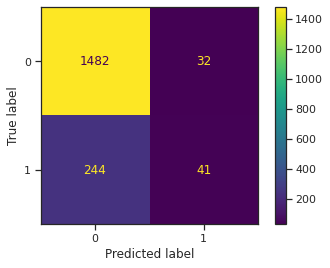

In [74]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_validation, y_pred, labels=grid_search_lr1.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=grid_search_lr1.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

The upper-left quadrant displays the number of true negatives.
The upper-right quadrant displays the number of false positives.
The bottom-left quadrant displays the number of false negatives.
The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

- True negatives: 1482

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

- False positives: 32

False negatives: The number of people who left that the model inaccurately predicted did not leave

- False negatives: 244

True positives: The number of people who left the model accurately predicted as leaving

- True positives: 41

**Since there aare more false negatives than true positives, the model will likely have poor performance.**

In [75]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_validation, y_pred, target_names=target_names))

get_scores('grid_search_lr1', grid_search_lr1, X_validation, y_validation)

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.98      0.91      1514
    Predicted would leave       0.56      0.14      0.23       285

                 accuracy                           0.85      1799
                macro avg       0.71      0.56      0.57      1799
             weighted avg       0.81      0.85      0.81      1799



,model,precision,recall,f1,accuracy,AUC
0,grid_search_lr1,0.561644,0.14386,0.22905,0.846581,0.561362


### Logistic Regression 1, Performance Metrics:
- 85% accurary
- 56% precision
- 14% recall
- 2% F1-Score
- AUC-ROC Score: 56.1%

Overall, this model performed quite poorly for 'Predicted would leave', further iteration is required.

## Second iteration of Logistic Regression Model:

#### Removing outliers and feature engineering

In [76]:
# Removing Outliers
outliers = outlier_detector('years_spend_company', 0.95)
df_log2 = df[~df.index.isin(outliers.index)]

#

df_log2['overworked'] = df_log2['average_monthly_hours']
df_log2['overworked'] = (df_log2['overworked'] > 180).astype(int)
df_log2['satisfaction_to_avg_hours'] = (df_log2['satisfaction_level'] / df_log2['average_monthly_hours'])*100

#Drop Irrelevant Features and Multicollinear Features
df_log2 = df_log2.drop(columns=['years_spend_company', 'bool_accident', 'satisfaction_level', 'average_monthly_hours'])

# Encode the `salary` column as an ordinal numeric category
df_log2_encoded = df_log2.copy()
df_log2_encoded['salary'] = (
    df_log2['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_log2_encoded = pd.get_dummies(df_log2_encoded, drop_first=False)

# Display the new dataframe
df_log2_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11167 entries, 0 to 11990
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   last_evaluation            11167 non-null  float64
 1   number_projects            11167 non-null  int64  
 2   did_leave                  11167 non-null  int64  
 3   promotion_last_5years      11167 non-null  int64  
 4   salary                     11167 non-null  int8   
 5   z_score_tenure             11167 non-null  float64
 6   overworked                 11167 non-null  int64  
 7   satisfaction_to_avg_hours  11167 non-null  float64
 8   department_IT              11167 non-null  uint8  
 9   department_RandD           11167 non-null  uint8  
 10  department_accounting      11167 non-null  uint8  
 11  department_hr              11167 non-null  uint8  
 12  department_management      11167 non-null  uint8  
 13  department_marketing       11167 non-null  uin

<Figure size 576x432 with 0 Axes>

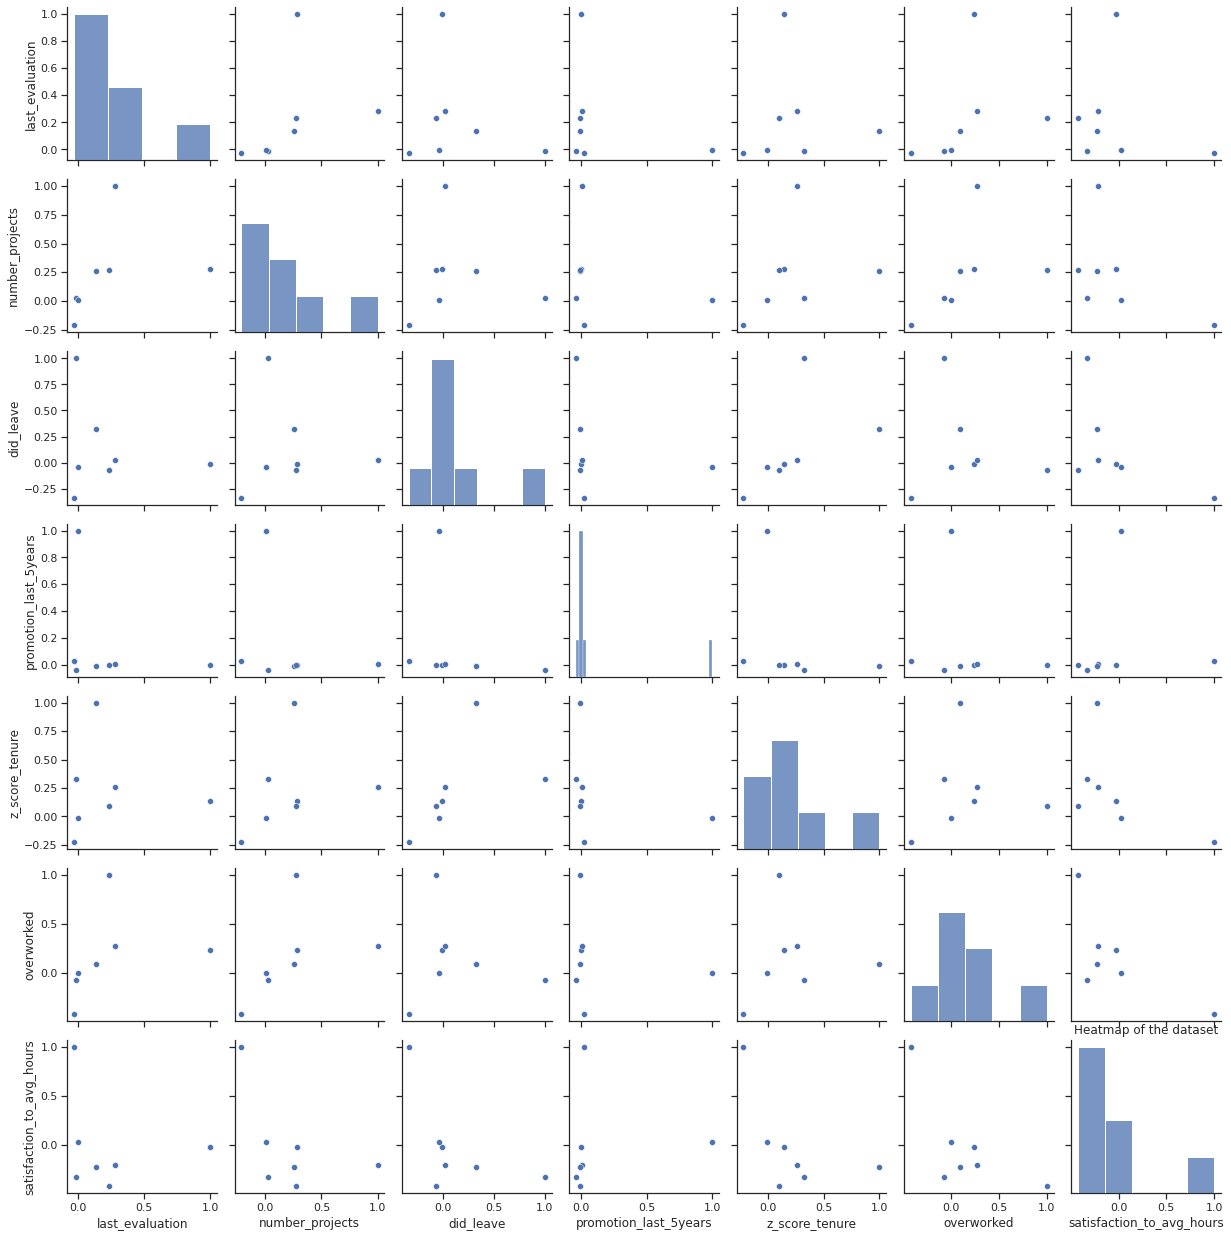

In [77]:
#Pairplot to Check for Multicollinearity

plt.figure(figsize=(8, 6))
sns.pairplot(df_log2.corr())
plt.title('Heatmap of the dataset')
plt.show()

In [78]:
# Split the data into a training set (70%) and a test set (30%)
# Removed holdout set due to inadequate model 1 performance

X = df_log2_encoded.drop(columns=['did_leave'])
y = df_log2_encoded['did_leave']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [79]:
# Prepocessing data
from sklearn import preprocessing 

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [80]:
log_model_2 = LogisticRegression(random_state=42, max_iter=500)

log_model_2.fit(X_train,y_train)

# get coefficients
coefficients = log_model_2.coef_

# get feature names
feature_names = X.columns

# Create a DataFrame to associate feature names with their coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients[0]})

# Display or analyze the coefficients
print(coefficients_df)
print(f'Intercept:{log_model_2.intercept_}')

                      Feature  Coefficient
0             last_evaluation     0.091356
1             number_projects    -0.407305
2       promotion_last_5years    -0.225814
3                      salary    -0.317202
4              z_score_tenure     0.996151
5                  overworked    -0.801452
6   satisfaction_to_avg_hours    -1.325715
7               department_IT     0.002473
8            department_RandD    -0.076516
9       department_accounting    -0.064616
10              department_hr     0.018099
11      department_management    -0.030878
12       department_marketing    -0.010464
13     department_product_mng    -0.007277
14           department_sales     0.029975
15         department_support     0.021984
16       department_technical     0.040915
Intercept:[-2.39723119]


In [81]:
y_pred = log_model_2.predict(X_test)

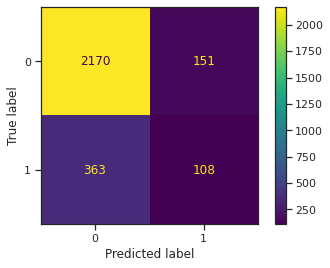

In [82]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_model_2.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_model_2.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

- True negatives: 2170

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

- False positives: 151

False negatives: The number of people who left that the model inaccurately predicted did not leave

- False negatives: 363

True positives: The number of people who left the model accurately predicted as leaving

- True positives: 108

In [83]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

get_scores('log_model_2', log_model_2, X_test, y_test)

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.89      2321
    Predicted would leave       0.42      0.23      0.30       471

                 accuracy                           0.82      2792
                macro avg       0.64      0.58      0.59      2792
             weighted avg       0.78      0.82      0.79      2792



,model,precision,recall,f1,accuracy,AUC
0,log_model_2,0.416988,0.229299,0.29589,0.815903,0.582121


#### Model 2 Performance:

Overall, the performance of this model is comparable to the first. We see a slight decrease in accuracy and f1-score at the benefit of moderate increases in recall and precision. The random forest model drastically outperforms both in performance accuracy. 

These logistic regression models may give some insight into explaining why employees might leave especially in tandem with the random forest model. 

In the future, it could be useful to optimize this model to get further interpretability. For now, the random forest model will suffice. 

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders

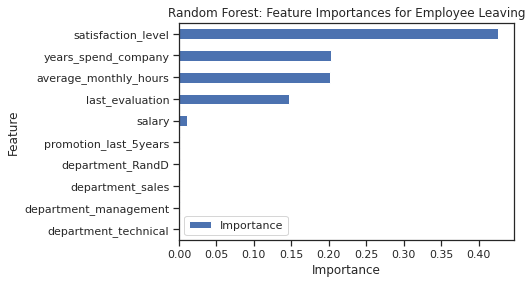

In [84]:
X = df_encoded.drop(columns=['did_leave'])
y = df_encoded['did_leave']

# Get feature importances
feat_impt = grid_search_forest1.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(grid_search_forest1.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

In [85]:
get_scores('grid_search_forest1', grid_search_forest1, X_validation, y_validation)

,model,precision,recall,f1,accuracy,AUC
0,grid_search_forest1,0.985019,0.922807,0.952899,0.985548,0.960083


# Modeling Stage Conclusion:

Overall, the Random Forest Model gave a robust classification model with relatively high intrepretability. Clearly, `satisfaction_level`, `years_spend_company`, `average_monthly_hours`, `last_evaluation`, and `salary` play a significant role in predicting `did_leave`. This supports our hypothesis from our initial analysis.

Furthermore, using K-Means clustering we found ways to classify employees who left based on their similar characteristics.

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

# Conclusion, Recommendations, Next Steps

Overall, I would recommend `Sailfort Motors` to analyze the efficiencies of their departments using the `departments_df` dataframe, and it's newly engineered features. By improving department efficiency, Sailfort Motors can increase employee `satisfaction_level`, decrease `average_monthly_hours` for workers who are overworked and increase `average_monthly_hours` for workers who are underworked. Continually, this increase in efficiency will increase `last_evaluation` scores across the company, which is not only beneficial to workers' `satisfaction_level` but also to Sailfort Motors. Finally, Sailfort Motors should consider implementing some sort of promotion structure to increase employee retention for its best performers. 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.